# Residual Networks Behave Like Ensembles of Relatively Shallow Networks

## 1. Introduction
- **Kiến trúc truyền thống trong thị giác máy tính**:
  - Hầu hết các hệ thống thị giác máy tính hiện đại tuân theo một quy trình kiến trúc phân cấp, xử lý đầu vào từ các đặc trưng cấp thấp đến các đặc trưng cấp cao chuyên biệt cho từng nhiệm vụ. 
  - Các mô hình như AlexNet và các mạng truyền thống khác phải xử lý từng lớp một cách tuần tự, không có đường tắt (skip connections).

- **Residual Networks - Cách tiếp cận mới**:
  - **Skip Connections**: Các mạng Residual giới thiệu các **skip connections** cho phép dữ liệu truyền từ bất kỳ lớp nào trực tiếp đến các lớp kế tiếp, bỏ qua các lớp residual.
  - **Độ sâu mạng**: Mặc dù Residual Networks có khả năng rất sâu (lên tới 1202 lớp), kết quả nghiên cứu cho thấy các **đường truyền ngắn** là những đường thực sự quan trọng đối với việc huấn luyện mạng, không phải là chiều sâu mạng.
  - **Không giải quyết vấn đề vanishing gradient bằng cách học sâu hơn**:
    - **Residual Networks** không giúp mạng học sâu hơn, mà thay vào đó **bảo tồn gradient** thông qua các đường truyền ngắn hơn, hiệu quả hơn, giúp mô hình tận dụng được các **skip connections**.
    - Điều này giải thích tại sao loại bỏ một số module trong quá trình kiểm thử không làm giảm hiệu suất mạng, đặc biệt là khi chỉ các đường ngắn mới đóng vai trò chủ yếu trong việc duy trì gradient.
  - **Bất ngờ**: Loại bỏ các lớp đơn lẻ khỏi Residual Networks trong giai đoạn kiểm thử không ảnh hưởng lớn đến hiệu suất, điều này rất khác biệt so với VGG, nơi việc loại bỏ lớp có thể dẫn đến giảm hiệu suất đáng kể.
  
- **Unraveled View**:
  - Residual Networks có thể được coi là một tập hợp của nhiều **đường truyền** thay vì là một mạng đơn.
  - **Câu hỏi**: Liệu các đường truyền trong mạng Residual có phụ thuộc lẫn nhau, hay chúng có thể hoạt động độc lập và mạng có khả năng phục hồi khi một số đường truyền bị xóa?

## 2. Contributions 

- **Giới thiệu mô hình unraveled view**:
  - Residual Networks có thể được xem như một tập hợp của nhiều đường truyền, thay vì một mạng cực sâu.
  - **Không phải chiều sâu**, mà chính **các đường truyền ngắn** là yếu tố chính đóng góp vào hiệu suất của mạng Residual.

- **Lesion Study**:
  - Thực hiện thí nghiệm loại bỏ các đường truyền để kiểm tra xem chúng có phụ thuộc vào nhau hay không. Các đường truyền trong Residual Networks không phụ thuộc mạnh vào nhau và hoạt động như một **ensemble**.
  - Loại bỏ các module chỉ có tác động nhỏ đến hiệu suất của mạng, cho thấy mạng không phụ thuộc vào việc học sâu hơn mà dựa vào các đường truyền hiệu quả hơn.

- **Phân tích dòng gradient**:
  - Phát hiện rằng chỉ các đường truyền ngắn trong Residual Networks mới đóng góp phần lớn vào việc học và duy trì gradient, thay vì các đường truyền sâu hơn.
  - **Residual Networks không giải quyết vấn đề vanishing gradient** bằng cách học sâu hơn, mà bằng cách bảo tồn dòng gradient thông qua các đường ngắn và các **skip connections** hiệu quả.

## 3. Residual Block
   - **Cấu trúc cơ bản**:
     - Đầu vào: $ x $
     - Biến đổi: $ \mathcal{F}(x, \mathbf{W}) $
     - Skip Connection: $ y = x + \mathcal{F}(x, \mathbf{W}) $
   - **Lợi ích**: Giải quyết vấn đề vanishing gradient, giúp mô hình sâu hơn và dễ huấn luyện hơn.

## 4. Stochastic Depth
   - **Khái niệm**:
     - Ngẫu nhiên bỏ qua một số **Residual Blocks** trong quá trình huấn luyện.
   - **Công thức**:
     - Nếu $ r = 0 $ (khối bị bỏ qua): $ y = x $
     - Nếu $ r = 1 $ (khối không bị bỏ qua): $ y = x + \mathcal{F}(x, \mathbf{W}) $
   - **Xác suất bỏ qua**: $ p_{\text{drop}} $ cho mỗi block, càng sâu thì xác suất bỏ qua càng cao.
   - **Ưu điểm**:
     - Giảm overfitting.
     - Tăng hiệu quả huấn luyện.
     - Các khối bị bỏ qua trong huấn luyện nhưng được sử dụng đầy đủ trong suy luận.

## 5. Lesion Study (4. Lesion Study)
   - **Thí nghiệm**:
     - Tiến hành 3 thí nghiệm **Lesion Study** nhằm loại bỏ các module hoặc tái cấu trúc mạng Residual để kiểm tra xem các đường truyền có phụ thuộc lẫn nhau không.
     - Loại bỏ các module không làm giảm hiệu suất đáng kể, cho thấy mạng Residual hành xử giống như một **ensemble** (tập hợp mô hình).
   - **Kết quả**:
     - **Các đường truyền** trong mạng Residual không phụ thuộc mạnh vào nhau và có thể hoạt động như các mô hình riêng lẻ.
     - Loại bỏ module chỉ làm ảnh hưởng nhỏ đến hiệu suất, ngoại trừ các module downsampling.
     - Điều này củng cố tầm quan trọng của **skip connections** trong việc duy trì hiệu suất của mạng.

## 6. Thí nghiệm loại bỏ module (4.1)
   - **Thí nghiệm**:
     - Loại bỏ từng module riêng lẻ trong mạng VGG và Residual Network sau khi đã huấn luyện xong.
     - Thay đổi từ $ y_i = y_{i-1} + f_i(y_{i-1}) $ sang $ y_i = y_{i-1} $ để chỉ truyền qua skip connection.
   - **Kết quả**:
     - **VGG**: Loại bỏ bất kỳ lớp nào làm giảm hiệu suất xuống mức cơ hội (chance level).
     - **Residual Networks**: Loại bỏ các block không ảnh hưởng nhiều đến hiệu suất, ngoại trừ việc loại bỏ các block downsampling (giảm kích thước) có thể ảnh hưởng đáng kể.

## 7. Thí nghiệm loại bỏ nhiều module (4.2)
   - **Thí nghiệm**:
     - Loại bỏ nhiều module khỏi mạng Residual để kiểm tra xem liệu mạng có hành xử giống như một **ensemble**.
   - **Kết quả**:
     - Hiệu suất của mạng Residual thay đổi mượt mà theo số lượng đường truyền hợp lệ còn lại trong mạng.
     - Mạng Residual hoạt động giống như một tập hợp (ensemble), với lỗi tăng đều khi các module bị xóa.

## 8. Phân phối độ dài đường truyền
   - **Tổng quan**:
     - Không phải tất cả các đường truyền đều có cùng độ dài.
     - Phân phối nhị thức xác định số lượng đường truyền có độ dài cụ thể.
     - Hơn 95% các đường truyền dài từ 19 đến 35 module trong mạng có 54 module.
   
   - **Vanishing Gradient**:
     - Các đường dài ảnh hưởng nhiều đến độ lớn gradient.
     - Đường ngắn quan trọng hơn trong việc duy trì hiệu năng.

## 9. Hiệu quả của đường truyền ngắn
   - **Đường truyền hiệu quả**:
     - Phần lớn các cập nhật gradient đến từ các đường ngắn (5-17 module).
     - Mặc dù chỉ chiếm 0.45% tổng số đường truyền, các đường ngắn đóng vai trò chủ yếu trong huấn luyện.
   - **Thí nghiệm huấn luyện lại**:
     - Huấn luyện lại chỉ với các đường ngắn đạt hiệu suất tương đương với mô hình đầy đủ.
     - Độ lỗi sau khi huấn luyện lại chỉ là 5.96% (so với 6.10% của mô hình đầy đủ).

## 10. Liên kết với Highway Networks
   - **Highway Networks**:
     - Sử dụng hàm gate $ t_i(\cdot) $ để điều khiển lượng dữ liệu đi qua residual connection và skip connection.
     - Giá trị $ t_i(\cdot) = 0.5 $ sử dụng cả hai đường đều nhau.
   - **Kết quả thực nghiệm**:
     - Các Highway Networks thiên về việc sử dụng skip connection.
     - Điều này củng cố tầm quan trọng của các đường truyền ngắn trong mạng.

## 11. Tác động của Stochastic Depth
   - **Hiệu ứng huấn luyện**:
     - Ngẫu nhiên bỏ qua các module residual trong quá trình huấn luyện.
     - Chỉ có các đường truyền ngắn được nhìn thấy thường xuyên trong mỗi mini-batch.
   - **Kết quả**:
     - Mạng có khả năng chịu đựng tốt hơn với việc xóa các module.
     - Khuyến khích các đường truyền ngắn học cách hoạt động độc lập và đạt kết quả tốt.

## 12. Thí nghiệm sắp xếp lại các module (4.3)
   - **Thí nghiệm**:
     - Thay đổi thứ tự sắp xếp các module trong mạng Residual bằng cách hoán đổi các cặp module có cùng kích thước chiều.
     - Loại trừ các module downsampling.
   - **Kết quả**:
     - Khi các cặp module bị hoán đổi, lỗi của mạng tăng lên mượt mà theo mức độ sắp xếp sai.
     - Điều này chứng tỏ rằng mạng Residual có thể được sắp xếp lại một cách linh hoạt trong quá trình suy luận mà không ảnh hưởng nhiều đến hiệu suất tổng thể.

## 14. Conclusion

- **Hiệu suất tăng của Residual Networks**:
  - He et al. (2016) đưa ra giả thuyết rằng lý do mạng Residual có hiệu suất tốt hơn là vì chúng **có khả năng sâu hơn** các mô hình trước đó. 
  - Mặc dù đây là một giả thuyết đúng, nhưng nghiên cứu của chúng tôi đưa ra một **giải thích bổ sung**: 
    - **Unraveled view** cho thấy mạng Residual có thể được xem như một **tập hợp của nhiều đường truyền** thay vì một mạng cực sâu duy nhất.
  
- **Lesion Study**:
  - **Các đường truyền** trong Residual Networks mặc dù được huấn luyện cùng nhau, không phụ thuộc mạnh vào nhau.
  - **Tính chất Ensemble-like**: Hiệu suất của mạng Residual tương quan mượt mà với số lượng đường truyền hợp lệ còn lại sau khi các module bị xóa.

- **Đường truyền đóng góp gradient**:
  - Phát hiện rằng các đường truyền đóng góp vào gradient trong quá trình huấn luyện ngắn hơn nhiều so với dự đoán.
  - **Đường truyền sâu** không yêu cầu trong quá trình huấn luyện vì chúng **không đóng góp gradient**.
  - Điều này cho thấy Residual Networks **không giải quyết vấn đề vanishing gradient** bằng cách giữ nguyên dòng gradient xuyên suốt toàn bộ độ sâu của mạng.

- **Tính chất quan trọng của chiều sâu**:
  - Phát hiện rằng chiều sâu mạng vẫn là một **câu hỏi mở** trong nghiên cứu.
  - Kết quả này cho thấy rằng, mặc dù các đường truyền sâu có thể không đóng góp gradient, **chiều sâu mạng** vẫn cần được xem xét và nghiên cứu thêm để hiểu rõ hơn về tác động của nó.

- **Góc nhìn mới**: 
  - Những quan sát hứa hẹn này mang lại một lăng kính mới để nghiên cứu mạng nơ-ron, không chỉ tập trung vào chiều sâu mà còn phải phân tích cách các đường truyền trong mạng hoạt động cùng nhau.



# Pre-act resnet

## 1. Abstract
   - **Residual networks (ResNets)**: Các kiến trúc học sâu với hiệu suất cao và khả năng hội tụ tốt.
   - **Identity mappings**: Khi sử dụng các phép ánh xạ đồng nhất như skip connections và kích hoạt sau phép cộng, tín hiệu có thể được truyền trực tiếp giữa các block.
   - **Ablation experiments**: Các thí nghiệm chứng minh tầm quan trọng của các phép ánh xạ đồng nhất này.
   - **New residual unit**: Đề xuất một đơn vị mới giúp việc huấn luyện dễ dàng hơn và cải thiện khả năng tổng quát hóa.
   - **Kết quả**: ResNet 1001 tầng đạt lỗi 4.62% trên CIFAR-10 và hoạt động tốt trên ImageNet.
---
## 2. Key Ideas and Experiments
   - **Direct signal propagation**: Với phép ánh xạ đồng nhất $ h(x_l) = x_l $, tín hiệu có thể được truyền trực tiếp từ block này đến block khác trong cả hai hướng (trước và sau).
   - **Experiments**: Cho thấy việc huấn luyện trở nên dễ dàng hơn khi kiến trúc gần với điều kiện sử dụng phép ánh xạ đồng nhất.
   - **Skip connections**: Giúp mạng ResNet có thể truyền tín hiệu dễ dàng qua các tầng, cải thiện gradient flow và tránh vấn đề vanishing gradient.
---
## 3. Performance Impact of Variants
   - **Faster error reduction**: Các đơn vị residual với ánh xạ đồng nhất đạt tốc độ giảm lỗi nhanh hơn và lỗi huấn luyện thấp nhất so với các biến thể khác.
   - **Scaling, gating, 1x1 convolutions**: Những kỹ thuật này dẫn đến lỗi huấn luyện và lỗi tổng quát hóa cao hơn.
---
## 4. Mathematical Formulation

- **Residual unit computation**:
  
  $$ y_l = h(x_l) + \mathcal{F}(x_l, W_l) $$

  - $ h(x_l) = x_l \ $ là phép ánh xạ đồng nhất, $ \mathcal{F} \ $ là hàm residual được tính bằng các lớp tích chập.
  
- **Gradient flow**: Phép tính gradient:
  
  $$ \frac{\partial E}{\partial x_l} = \frac{\partial E}{\partial x_L} \left( 1 + \frac{\partial}{\partial x_l} \sum_{i=l}^{L-1} \mathcal{F}(x_i, W_i) \right) $$

  - Gradient được chia thành hai phần: một phần truyền trực tiếp và một phần truyền qua các lớp trọng số.
---
## 5. Experiment
   - **ResNet-110**: Thí nghiệm thực hiện trên kiến trúc ResNet-110 với 54 đơn vị residual (mỗi đơn vị gồm 2 lớp tích chập 3x3).
   - **CIFAR-10 dataset**: Mô hình được huấn luyện trên bộ dữ liệu CIFAR-10, với báo cáo về độ chính xác trung vị (median accuracy) của **5 lần chạy** để giảm thiểu tác động của các biến thiên ngẫu nhiên.

   ### 5.1. **Constant Scaling**
   - **Setting**: 
     - Đặt $ \lambda = 0.5 $ cho tất cả các shortcut.
     - Thử nghiệm với hai trường hợp:
       - (i) $ \mathcal{F} $ không được nhân tỉ lệ.
       - (ii) $ \mathcal{F} $ được nhân với hệ số $ 1 - \lambda = 0.5 $.
   - **Kết quả**:
     - Trường hợp (i): Không hội tụ tốt.
     - Trường hợp (ii): Hội tụ nhưng có lỗi kiểm tra cao hơn (12.35% so với 6.61% của ResNet-110 gốc).

   ### 5.2. **Exclusive Gating**
   - **Gating function**: $ g(x) = \sigma(W_g x + b_g) $, với $ \sigma(x) $ là hàm sigmoid.
   - **Scaling**: Đường tắt (shortcut path) được nhân với $ 1 - g(x) $.
   - **Initialization**: Khởi tạo giá trị bias $ b_g $ là rất quan trọng để huấn luyện các mô hình có cổng (gated models).
     - Giá trị tốt nhất $ b_g = -6 $, đạt kết quả 8.70% trên bộ kiểm tra, vẫn kém hơn mô hình ResNet-110 gốc.
   - **Kết quả**:
     - Nếu không khởi tạo phù hợp $ b_g $, mạng không hội tụ đến giải pháp tốt.

   ### 5.3. **Shortcut-only Gating**
   - **Chỉ đường tắt (shortcut path)** được nhân tỉ lệ bởi $ 1 - g(x) $.
   - **Initialization**: Giá trị khởi tạo của $ b_g $ rất quan trọng. Nếu $ b_g = 0 $, lỗi kiểm tra lên đến 12.86%.
   - **Kết quả**:
     - Khi $ b_g $ có giá trị rất âm (ví dụ, $ -6 $), giá trị $ 1 - g(x) $ gần $ 1 $ và shortcut path gần như là ánh xạ đồng nhất, đạt kết quả 6.91%, gần với ResNet-110 gốc.

   ### 5.4. **1x1 Convolutional Shortcut**
   - **1x1 Convolution**: Thay thế ánh xạ đồng nhất trong shortcut bằng lớp tích chập 1x1.
   - **Kết quả**:
     - Trên mô hình ResNet-34 (16 đơn vị residual), kết quả tốt, cho thấy shortcut 1x1 có thể hữu ích.
     - Tuy nhiên, trên ResNet-110, kết quả kém hơn (12.22%) khi sử dụng tích chập 1x1.
     - Vấn đề do stacking nhiều đơn vị residual có thể cản trở việc truyền tín hiệu.

   ### 5.5. **Dropout Shortcut**
   - **Dropout**: Áp dụng Dropout (với tỷ lệ 0.5) trên đầu ra của shortcut.
   - **Kết quả**:
     - Mạng không hội tụ đến giải pháp tốt khi áp dụng dropout cho đường tắt.
     - Dropout làm suy yếu khả năng truyền tín hiệu, tương tự như khi dùng constant scaling với $ \lambda = 0.5 $.

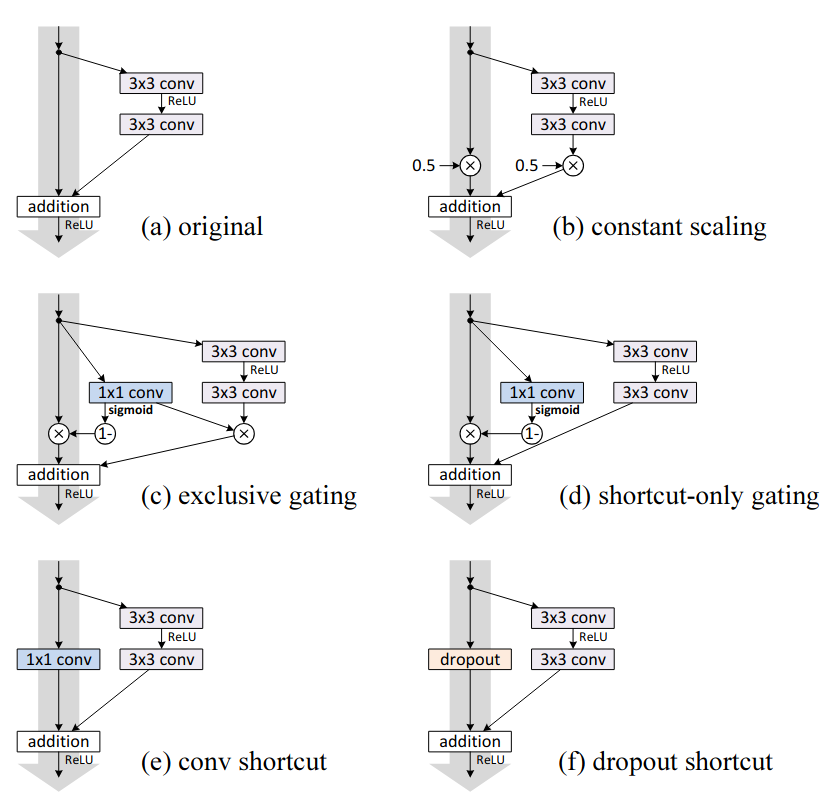
---
## 6 Thảo luận
   - **Shortcut connections**: Các kết nối shortcut là đường truyền thông tin trực tiếp nhất trong mạng. Việc áp dụng các phép biến đổi nhân (như scaling, gating, 1x1 convolutions và dropout) lên các shortcut này có thể làm gián đoạn quá trình lan truyền thông tin và dẫn đến các vấn đề tối ưu hóa.
   - **Gating và 1x1 Convolution**: Những phép biến đổi này làm tăng số lượng tham số và có thể có khả năng biểu diễn mạnh mẽ hơn so với các identity shortcuts. Tuy nhiên, kết quả thí nghiệm chỉ ra rằng lỗi huấn luyện của các mô hình sử dụng gating và 1x1 convolution cao hơn so với identity shortcuts. Điều này cho thấy rằng vấn đề xuất phát từ việc tối ưu hóa chứ không phải từ khả năng biểu diễn của các mô hình này.
---
## 7 Sử dụng hàm kích hoạt
   - Các thí nghiệm trước đó được thực hiện dựa trên giả định rằng hàm kích hoạt sau phép cộng là **identity mapping**.
   - **Điều tra thêm**: Ảnh hưởng của hàm kích hoạt $ \mathcal{F} $ sẽ được nghiên cứu thêm.
   
   ### 7.1. Tái sắp xếp các hàm kích hoạt
   - **Mục tiêu**: Biến  $ \mathcal{F} $  thành **identity mapping**, việc này được thực hiện bằng cách tái sắp xếp thứ tự của các hàm kích hoạt (ReLU và Batch Normalization - BN).
   - **Thiết kế gốc của Residual Unit**: 
     - Trong thiết kế ban đầu, BN được áp dụng sau mỗi lớp trọng số và ReLU được áp dụng sau BN, trừ lớp ReLU cuối cùng nằm sau phép cộng element-wise.
   - **Phân tích**: Các phương án khác nhau trong việc thay đổi vị trí của hàm kích hoạt đã được thí nghiệm và được thể hiện trong các hình ảnh kèm theo sau đây nhằm hiểu rõ hơn về cách các hàm kích hoạt tác động đến việc lan truyền thông tin trong mạng.

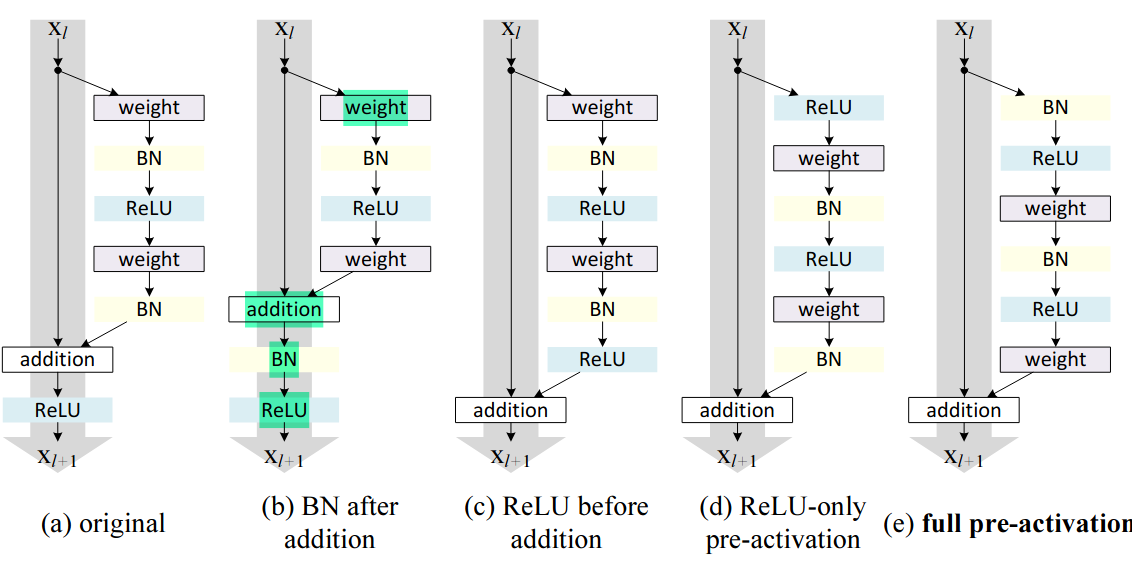

  ### 7.2 Experiments on Activation


  ####  **Kiến trúc thử nghiệm**

  - **ResNet-110 và ResNet-164 Bottleneck**:

    - ResNet-164 Bottleneck gồm một lớp $1 \times 1$ để giảm chiều, một lớp $3 \times 3$, và một lớp $1 \times 1$ để khôi phục chiều.

    - Độ phức tạp tính toán tương tự với hai đơn vị residual $3 \times 3$ của ResNet-110.

    - ResNet-164 đạt độ lỗi cạnh tranh là **5.93% trên CIFAR-10**.



  #### **Thử nghiệm với Batch Normalization (BN)**

  - **BN sau phép cộng**:

    - Áp dụng Batch Normalization (BN) sau phép cộng trong ResNet.

    - Kết quả: Hiệu năng suy giảm đáng kể so với baseline.

    - Lý do: BN làm thay đổi tín hiệu truyền qua skip connection, gây khó khăn cho việc truyền thông tin và làm giảm hiệu suất huấn luyện.



  #### **Thử nghiệm với ReLU**

  - **ReLU trước phép cộng**:

    - Di chuyển ReLU trước phép cộng để đảm bảo đầu ra của hàm residual luôn không âm.

    - Kết quả: Hiệu năng cũng tệ hơn baseline (lỗi **7.84%**).

    - Lý do: Hàm residual nên có giá trị trên toàn bộ miền $(-\infty, +\infty)$ để đảm bảo khả năng biểu diễn tốt hơn.



  #### **Post-activation hay Pre-activation?**

  - Trong thiết kế gốc của ResNet, kích hoạt ảnh hưởng đến cả hai đường truyền (cả đường tắt và đường residual).

  - Đề xuất thiết kế không đối xứng, trong đó kích hoạt chỉ ảnh hưởng đến đường residual:

    - Công thức mới:

      $$ y_{l+1} = y_l + \mathcal{F}(\hat{f}(x_l), W_l) $$

      - Ở đây, $\hat{f}$ chỉ ảnh hưởng đến đường residual, trong khi đường tắt được giữ nguyên.



  - **So sánh giữa post-activation và pre-activation**:

    - Khi sử dụng BN và ReLU trước các lớp trọng số (pre-activation), kết quả được cải thiện đáng kể.

    - Kết quả từ bảng thí nghiệm cho thấy pre-activation giúp mô hình hiệu suất tốt hơn so với baseline trong cả ResNet-110 và ResNet-164.
---

## 8. Phân tích

- **Ảnh hưởng của pre-activation**:
    - **Tối ưu hóa**: Pre-activation giúp tối ưu hóa dễ dàng hơn, đặc biệt trong các mô hình ResNet có 1001 lớp.
    - **Sử dụng BN làm pre-activation**: Việc sử dụng Batch Normalization (BN) trước các lớp giúp điều chỉnh mô hình tốt hơn.
    - **Tối ưu hóa dễ dàng hơn**: Mô hình giảm lỗi huấn luyện rất nhanh, đạt được mức lỗi thấp nhất so với tất cả các mô hình đã thử nghiệm.
    - **Ảnh hưởng của $f$ (ReLU)**: Khi $f = \text{ReLU}$, tín hiệu bị ảnh hưởng, đặc biệt nếu âm. Nhưng khi $f$ là ánh xạ đồng nhất, tín hiệu được truyền trực tiếp giữa các đơn vị, giúp huấn luyện nhanh hơn.

- **Giảm overfitting**:
    - **Chuẩn hóa bằng BN**: Tín hiệu được chuẩn hóa trước khi cộng trong cài đặt pre-activation, điều này giúp tránh hiện tượng overfitting.
    - **Tín hiệu shortcut và tín hiệu gộp**: Trong cài đặt gốc, BN chuẩn hóa tín hiệu nhưng sau đó cộng vào shortcut mà không chuẩn hóa tín hiệu gộp.
    - **Hiệu suất cải thiện**: Phiên bản pre-activation đạt lỗi kiểm tra thấp hơn so với các mô hình gốc trên cả CIFAR-10, CIFAR-100 và ResNet-110.

---

## 9. Kết luận

- **Những phát hiện chính**:
    - Các công thức lan truyền tín hiệu trong mạng sâu residual đã được phân tích, cho thấy các phép ánh xạ đồng nhất ở skip connection và phép kích hoạt sau khi cộng giúp làm mượt quá trình truyền thông tin.
    - Các thí nghiệm loại bỏ (ablation) xác nhận các phân tích lý thuyết.
    - **Thành tựu chính**: Các mạng sâu có 1000 lớp có thể được huấn luyện dễ dàng và đạt độ chính xác cao hơn so với các mô hình trước đó.




## 10. Implementation

In [8]:
import torch
import torch.nn as nn
from typing import Type, List, Union

class PreActBlock(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        stride: int = 1,
        dtype: torch.dtype = torch.float32,
        device: torch.device = torch.device("cpu")
    ) -> None:
        super(PreActBlock, self).__init__()

        self.bn1 = nn.BatchNorm2d(
            in_channels, 
            device = device, 
            dtype = dtype
        )
        
        self.conv1 = nn.Conv2d(
            in_channels = in_channels,
            out_channels = out_channels,
            kernel_size = 3,
            stride = stride,
            padding = 1,
            bias = False,
            device = device,
            dtype = dtype
        )
        self.bn2 = nn.BatchNorm2d(
            out_channels, 
            device = device, 
            dtype = dtype
        )
        self.conv2 = nn.Conv2d(
            out_channels,
            out_channels,
            kernel_size = 3,
            padding = 1,
            bias = False,
            device = device,
            dtype = dtype
        )

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    in_channels = in_channels,
                    out_channels = out_channels,
                    kernel_size = 1,
                    stride = stride,
                    bias = False,
                    device = device,
                    dtype = dtype
                )
            )

    def forward(
        self, x: torch.Tensor
    ) -> torch.Tensor:
        out = self.conv1(torch.relu(self.bn1(x)))
        out = self.conv2(torch.relu(self.bn2(out)))
        shortcut = self.shortcut(x)
        return out + shortcut


class PreActResNet(nn.Module):
    def __init__(
        self,
        block: Type[PreActBlock],
        layers: List[int],
        num_classes: int = 10,
        dtype: torch.dtype = torch.float32,
        device: torch.device = torch.device("cpu")
    ) -> None:
        super(PreActResNet, self).__init__()

        self.in_channels = 64
        self.conv1 = nn.Conv2d(
            in_channels = 3,
            out_channels = 64,
            kernel_size = 3,
            stride = 1,
            padding = 1,
            bias = False,
            device = device,
            dtype = dtype
        )

        self.layer1 = self._make_layer(
            block, 64, layers[0], 
            stride = 1, 
            dtype = dtype, 
            device = device
        )

        self.layer2 = self._make_layer(
            block, 128, layers[1], 
            stride = 2, 
            dtype = dtype, 
            device = device
        )
        self.layer3 = self._make_layer(
            block, 256, layers[2], 
            stride = 2, 
            dtype = dtype, 
            device = device
        )
        
        self.layer4 = self._make_layer(
            block, 512, layers[3], 
            stride = 2, 
            dtype = dtype,
            device = device
        )

        self.linear = nn.Linear(
            512, num_classes, 
            device = device,
            dtype = dtype
        )

    def _make_layer(
        self,
        block: Type[PreActBlock],
        out_channels: int,
        num_blocks: int,
        stride: int,
        dtype: torch.dtype,
        device: torch.device
    ) -> nn.Sequential:
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(
                self.in_channels, 
                out_channels, 
                stride = stride, 
                dtype = dtype, 
                device = device
            ))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(
        self, 
        x: torch.Tensor
    ) -> torch.Tensor:
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = torch.flatten(torch.nn.functional.avg_pool2d(x, 4), 1)
        x = self.linear(x)
        return x


def PreActResNet18(
    num_classes: int = 10,
    dtype: torch.dtype = torch.float32,
    device: torch.device = torch.device("cpu")
) -> PreActResNet:
    return PreActResNet(
        PreActBlock, [2, 2, 2, 2], 
        num_classes = num_classes, 
        dtype = dtype, 
        device = device
    )

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float64
model = PreActResNet18(dtype = dtype, device = device)

print(model)
x = torch.randn(1, 3, 32, 32, dtype = dtype).to(model.linear.weight.device)
output = model(x)
print(output.shape)


PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential()
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential()
    )
  )
  (layer

# Weighted Residuals for Very Deep Networks (2016)

## Tóm tắt

Mạng dư sâu gần đây đã cho thấy hiệu suất hấp dẫn đối với nhiều nhiệm vụ thị giác máy tính đầy thách thức. Tuy nhiên, cấu trúc còn sót lại ban đầu vẫn còn một số khiếm khuyết gây khó khăn cho việc hội tụ trên các mạng rất sâu. Trong bài viết này, tác giả giới thiệu **mạng dư có trọng số** để giải quyết sự không tương thích giữa **ReLU** và phép cộng theo từng phần tử cũng như vấn đề khởi tạo mạng sâu.

**Mạng phần dư có trọng số** có thể học cách kết hợp phần dư từ các lớp khác nhau một cách hiệu quả và hiệu quả. Các mô hình được đề xuất có sự cải thiện nhất quán về độ chính xác và độ hội tụ với độ sâu tăng dần từ hơn 100 lớp lên hơn 1000 lớp. 

Ngoài ra, **mạng dư có trọng số** có gánh nặng tính toán và bộ nhớ GPU cao hơn một chút so với các mạng dư ban đầu. Các mạng được tối ưu hóa bằng cách giảm độ dốc ngẫu nhiên dự kiến.

Các thử nghiệm trên **CIFAR-10** đã chỉ ra rằng thuật toán của chúng tôi có **tốc độ hội tụ nhanh hơn** so với các mạng dư ban đầu và đạt **độ chính xác cao 95,3%** với mô hình 1192 lớp.

## 1. Introduction

- **Vấn đề của mạng ResNet gốc**: Mạng Residual ban đầu có những khuyết điểm làm cho việc huấn luyện các mạng rất sâu trở nên khó khăn, đặc biệt với hơn 1000+ lớp. Các vấn đề như sự không tương thích giữa hàm **ReLU** và phép cộng theo phần tử (element-wise addition) dẫn đến các khó khăn trong việc khởi tạo và hội tụ.

- **Cách tiếp cận của Weighted Residual Networks (WRN)**: WRN được giới thiệu để khắc phục những vấn đề trên. Nó giúp kết hợp hiệu quả hơn các tín hiệu dư thừa (residual signals) từ các lớp khác nhau trong mạng. Nhờ cách học trọng số từ các tín hiệu dư thừa (residual weights), WRN có thể cải thiện khả năng hội tụ và độ chính xác của mạng với số lớp lên tới 1192 (thậm chí hội tụ nhanh hơn 100 lớp) lớp mà không cần sử dụng chiến lược "warm up".

- **Tín hiệu "highway"**: Đây là tín hiệu quan trọng trong mạng ResNet giúp thông tin được truyền qua các lớp sâu. Tuy nhiên, với cấu trúc mạng sâu hơn, việc thêm tín hiệu highway có thể làm giảm khả năng đại diện của mạng. WRN khắc phục điều này bằng cách học cách kết hợp các tín hiệu dư thừa từ nhiều lớp khác nhau một cách hiệu quả hơn.

- **Vấn đề khởi tạo cho mạng rất sâu**: Các phương pháp khởi tạo truyền thống như **xavier** hay **msra** thường gặp khó khăn khi áp dụng cho các mạng có độ sâu lớn hơn 100 lớp. WRN giải quyết điều này bằng cách sử dụng một chiến lược học trọng số dư thừa với tỷ lệ học nhỏ để giúp mạng hội tụ nhanh hơn mà không cần giảm tốc độ học.

## 2. Contributions

**WRN** mang đến bốn đóng góp chính:

1. **Học cách kết hợp các tín hiệu dư thừa từ mỗi đơn vị residual**: WRN cho phép kết hợp tín hiệu từ các lớp khác nhau một cách hiệu quả hơn, giúp mạng hội tụ nhanh hơn trong giai đoạn huấn luyện và đạt độ chính xác cao hơn so với mạng Residual ban đầu mà chỉ thêm một chút chi phí tính toán và bộ nhớ GPU.

2. **Giải quyết vấn đề không tương thích giữa ReLU và phép cộng theo phần tử**: WRN giải quyết sự không tương thích này bằng cách thêm các trọng số vào tín hiệu dư thừa, giúp tín hiệu "highway" được truyền tải mà không bị cản trở.

3. **Cải thiện quá trình hội tụ với mạng có độ sâu lớn**: WRN cho phép các tín hiệu dư thừa được thêm dần dần vào tín hiệu "highway", làm quá trình hội tụ trở nên ổn định hơn, ngay cả khi độ sâu mạng vượt quá 1000 lớp mà không cần sử dụng các chiến lược "warm up" như trong mạng Residual truyền thống.

4. **Cải tiến bước down-sampling**: WRN điều chỉnh bước down-sampling để đảm bảo rằng kích thước không gian và chiều đặc trưng của tín hiệu "highway" và tín hiệu dư thừa nhánh được đồng bộ, tránh việc sử dụng các phương pháp zero-padding hoặc ma trận chuyển đổi dư thừa.

## 3. Các quan sát và hiệu quả

- **Hiệu quả trên tập CIFAR-10**: Trong các thí nghiệm với CIFAR-10, WRN cho thấy tốc độ hội tụ nhanh hơn đáng kể và đạt độ chính xác cao hơn (95.3%) với mô hình có 1192 lớp. Điều này khẳng định rằng việc sử dụng các trọng số dư thừa trong WRN mang lại hiệu quả tích cực so với mạng Residual thông thường.

- **Sự tiết kiệm bộ nhớ và tính toán**: WRN chỉ thêm một chút chi phí về mặt tính toán và bộ nhớ so với mạng Residual truyền thống, nhưng đổi lại mang lại nhiều lợi ích về mặt hiệu suất và độ chính xác trong các mạng rất sâu.

## 4. Related Works

- **Residual Networks (ResNets)** đã thu hút rất nhiều sự quan tâm từ các nhà nghiên cứu, đặc biệt trong các tác vụ thị giác máy tính. Mạng Residual đơn giản hóa mạng highway bằng cách sử dụng các kết nối bỏ qua (identity skip connection), cho phép thông tin được truyền trực tiếp qua các lớp phức tạp.

- **Hai luồng thông tin trong một đơn vị residual**: Một luồng tín hiệu đi qua kết nối bỏ qua (highway signal) và một luồng đi qua các phép biến đổi tích chập, chuẩn hóa (Conv-BN-ReLU-Conv-BN). Hai luồng thông tin này được kết hợp lại bằng phép cộng theo phần tử (element-wise addition) trước khi đi qua một lớp **ReLU** để kích hoạt. 

- **Vấn đề với ReLU trong mạng Residual**: Trong mạng Residual gốc, hai luồng thông tin được cộng lại trước khi đi qua ReLU, điều này chỉ tạo ra đầu ra không âm (non-negative output), khiến tín hiệu từ nhánh residual chỉ có thể cải thiện tín hiệu highway thay vì được "kích hoạt" một cách độc lập.

- **Cấu trúc "Pre-activation"**: Để giải quyết vấn đề này, He et al. [4] đã đề xuất một cấu trúc "pre-activation", trong đó các lớp **BN-ReLU-Conv-BN-ReLU-Conv** được sắp xếp lại để giải quyết sự không tương thích giữa ReLU và phép cộng theo phần tử.

- **Huấn luyện mạng residual**: Để huấn luyện các mạng residual, người ta thường tập trung vào tín hiệu "residual". Tuy nhiên, Huang et al.  đã đề xuất một mạng dropout residual, trong đó tín hiệu residual nhánh bị loại bỏ ngẫu nhiên trong mỗi đơn vị residual. Điều này giúp mạng tập trung hơn vào tín hiệu "residual", và mô hình có thể coi như một tập hợp các mạng có độ sâu khác nhau, được gọi là "stochastic depth networks".

- **Tầm quan trọng của độ sâu và độ rộng trong mạng tích chập**: Trong các mạng tích chập, cả độ sâu (depth) và độ rộng (width) đều quan trọng cho hiệu suất phân loại hình ảnh. Một số nghiên cứu đã cho thấy việc tăng kích thước đặc trưng (feature dimension) của các lớp tích chập giúp tăng cường hiệu suất, nhưng cũng làm tăng chi phí tính toán và bộ nhớ GPU.

- **Mục tiêu chính của bài báo**: Trong bài báo này, tác giả tập trung vào việc huấn luyện các mô hình với độ sâu hơn 100 lớp, với mục tiêu khám phá cách huấn luyện các mạng rất sâu hiệu quả hơn thay vì chỉ tinh chỉnh mô hình.


## 5. Weighted Residual Networks

- **Tổng quan về Residual Networks**: Các mạng residual cho phép xây dựng một "highway" để thông tin từ các đặc trưng trước đó có thể chảy qua các lớp sau mà không bị thay đổi, thông qua các kết nối bỏ qua. Trong một đơn vị residual, phép tính được thực hiện như sau:

$$
x_{i+1} = \text{ReLU}(x_i + \Delta L_i(x_i, \theta_i))
$$

- Trong đó, $x_i$ là tín hiệu "highway" đầu vào cho đơn vị residual thứ $i$. $\theta_i$ là tham số bộ lọc và $\Delta L_i$ là hàm residual, được thực hiện bởi một chồng hai lớp tích chập $3 \times 3$. Một lớp tích chập thường đi kèm với một lớp chuẩn hóa (BatchNorm) và một lớp ReLU để tạo ra phi tuyến tính. 

- **Incompatibility of ReLU and element-wise addition**: Hàm ReLU chỉ tạo ra đầu ra không âm, do đó nó không tương thích với phép cộng theo phần tử trong đơn vị residual. Điều này giới hạn khả năng đại diện của tín hiệu residual. Để giải quyết, một số giải pháp như thiết kế các hàm kích hoạt khác với phạm vi rộng hơn có thể được áp dụng.

### Initialization of Very Deep Networks

- **Vấn đề khi khởi tạo các mạng rất sâu**: Các mạng với hơn 1000 lớp, dù được trang bị cấu trúc residual, BatchNorm và ReLU, vẫn gặp khó khăn trong việc hội tụ. Một số chiến lược như "warm up" được đề xuất, trong đó mạng được huấn luyện với một tốc độ học nhỏ trong vài epoch và sau đó khôi phục lại tốc độ học ban đầu. Tuy nhiên, với các mạng rất sâu, chiến lược này vẫn không đủ để đảm bảo hội tụ.

- **Khởi tạo trọng số msra**: Trong các mạng rất sâu, các tín hiệu residual từ mỗi khối được cộng lại, và điều này làm quá trình huấn luyện trở nên khó khăn hơn. Tuy nhiên, các trọng số trong các hàm residual thường được khởi tạo bằng phương pháp "msra", giúp tránh việc tạo ra các trọng số toàn zero.

### 5.1 Weighted Residuals

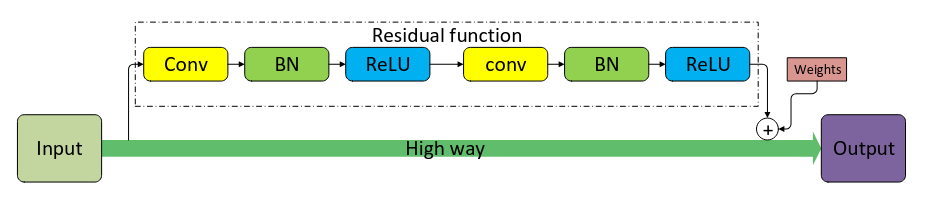

- **Giới thiệu về Weighted Residual Networks**: Để giải quyết sự không tương thích giữa ReLU và phép cộng theo phần tử, đồng thời cải thiện việc khởi tạo cho các mạng rất sâu, tác giả đề xuất mạng **Weighted Residual Networks**. Trong một đơn vị residual có trọng số (weighted residual unit), tín hiệu được tính như sau:

$$
x_{i+1} = x_i + \lambda_i \Delta L_i(x_i, \theta_i), \lambda_i \in (-1, 1)
$$

- **Ý nghĩa của các thành phần**:
  - $x_i$ là tín hiệu đầu vào highway.
  - $\theta_i$ là tham số bộ lọc, được khởi tạo bằng phương pháp "msra".
  - $\lambda_i$ là trọng số cho tín hiệu residual, được khởi tạo bằng 0 và học dần với tốc độ học nhỏ.
  - $\Delta L_i$ là hàm residual, được thực hiện bởi hai lớp Conv-BN-ReLU.

- **Vấn đề với ReLU**: Để giải quyết sự không tương thích giữa ReLU và phép cộng theo phần tử, ReLU được loại bỏ khỏi tín hiệu highway và chỉ áp dụng cho hàm residual $\Delta L_i$. Điều này giúp tín hiệu residual có thể biểu diễn tốt hơn các giá trị âm và dương.

#### Tín hiệu trong các khối rất sâu

- Với các khối rất sâu, biểu diễn đặc trưng của lớp $x_{i+k}$ có thể được biểu diễn như tổng của biểu diễn đầu vào $x_i$ và một chuỗi các hàm residual có trọng số:

$$
x_{i+k} = x_i + \sum_{j=1}^{k} \lambda_{i+j} \Delta L_{i+j}(x_i, \theta_{i+j}), \lambda_{i+j} \in (-1, 1)
$$

- **Tránh sự biến mất gradient (vanishing gradient)**: Trong giai đoạn lan truyền ngược (backpropagation), gradient của bất kỳ lớp nào cũng không biến mất khi tham số bộ lọc $\theta_{i+j}$ rất nhỏ. Điều này tương tự như cách tiếp cận "pre-activation" trong các mạng Residual thông thường, nhưng thay đổi thứ tự các lớp Conv-BN-ReLU thành BN-ReLU-Conv.

- **Phân phối trọng số residual**: Trong một mô hình với 1192 lớp, các trọng số residual được học dao động trong khoảng (-0.5, 0.5) theo một phân phối đối xứng. Điều này cho thấy rằng tín hiệu residual nhánh có khả năng tăng cường hoặc làm suy yếu tín hiệu highway, giúp giải quyết sự không tương thích giữa ReLU và phép cộng theo phần tử.

## 6. Conclusion

- **Nhược điểm của mạng Residual truyền thống**:
  1. Sự không tương thích giữa **ReLU** và phép cộng theo phần tử (element-wise addition).
  2. Khó khăn trong việc hội tụ khi các mạng có độ sâu vượt quá 1000 lớp, sử dụng phương pháp khởi tạo "msra".

- **Weighted Residual Networks**: Bài báo này giới thiệu mạng **Weighted Residual Networks** để khắc phục các vấn đề trên, giúp các mạng residual rất sâu hội tụ nhanh hơn và đạt được hiệu suất cao hơn với chi phí tính toán và bộ nhớ GPU tăng không đáng kể so với mạng Residual truyền thống.

- **Hiệu quả**: Các tín hiệu residual được thêm dần dần vào tín hiệu highway thông qua các trọng số được học từ từ, giúp đảm bảo quá trình hội tụ. Kết quả thực nghiệm trên CIFAR-10 cho thấy tính hiệu quả của **Weighted Residual Networks** cho các mô hình rất sâu. Các cải tiến được quan sát rõ rệt ở cả độ chính xác và khả năng hội tụ khi độ sâu của mạng tăng từ hơn 100 lớp lên tới hơn 1000 lớp.

- **Tính thực tiễn**: Weighted Residual Networks đơn giản và dễ triển khai, nhưng mang lại hiệu quả thực tế bất ngờ, khiến nó trở thành công cụ hữu ích cho các mạng residual phức tạp trong nghiên cứu và các ứng dụng thực tế.


# 7. Implementation

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class WResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None, weight_init_value=0.0):
        super(WResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        self.downsample = downsample
        self.weight = nn.Parameter(torch.tensor(weight_init_value))

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        # Weighted residual connection
        out = identity + self.weight * out
        out = self.relu(out)

        return out


class WResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10, weight_init_value=0.0):
        super(WResNet, self).__init__()
        self.in_channels = 64

        # Initial Convolution Layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        # Residual layers
        self.layer1 = self._make_layer(block, 64, layers[0], stride=1, weight_init_value=weight_init_value)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, weight_init_value=weight_init_value)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, weight_init_value=weight_init_value)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, weight_init_value=weight_init_value)

        # Fully connected layer
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride, weight_init_value):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample, weight_init_value))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels, weight_init_value=weight_init_value))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


def WResNet18(num_classes=10, weight_init_value=0.0):
    return WResNet(WResNetBlock, [2, 2, 2, 2], num_classes=num_classes, weight_init_value=weight_init_value)


# Testing the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = WResNet18(num_classes=10, weight_init_value=0.1).to(device)

# Example input
x = torch.randn(1, 3, 32, 32).to(device)
output = model(x)
print(output.shape)  # Output shape should be (1, 10)


torch.Size([1, 10])


# Aggregated Residual Transformations for Deep Neural Networks (ResNext) - 2016

**ResNeXt** là một biến thể của **ResNet**, được thiết kế để cải thiện khả năng biểu diễn và hiệu suất của mô hình mà không làm tăng đáng kể độ phức tạp tính toán. ResNeXt được giới thiệu trong bài báo "Aggregated Residual Transformations for Deep Neural Networks" của Saining Xie et al. (2017).

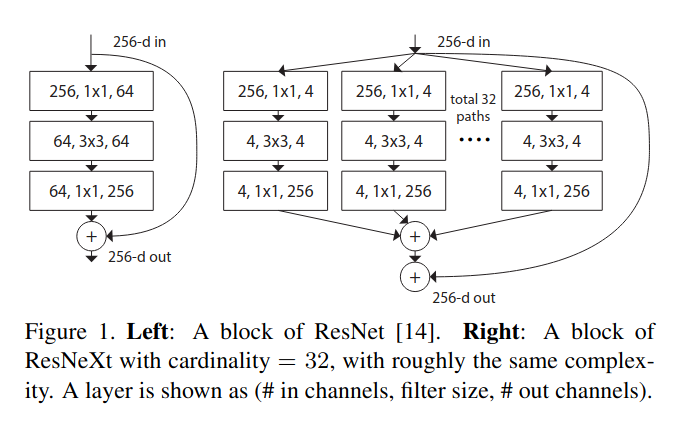

## Introduction

### Sự chuyển đổi trong lĩnh vực nhận dạng thị giác

Nghiên cứu về nhận dạng thị giác đang trải qua một sự chuyển đổi từ việc "kỹ thuật đặc trưng" (feature engineering) sang "kỹ thuật mạng" (network engineering). Thay vì phải thiết kế các đặc trưng thủ công như SIFT và HOG, các đặc trưng hiện nay được học thông qua các mạng nơ-ron được huấn luyện trên dữ liệu lớn. Điều này giúp giảm thiểu sự can thiệp của con người trong quá trình học và có thể chuyển giao kiến thức cho nhiều nhiệm vụ nhận dạng khác nhau.

Động lực chính cho sự thay đổi này đến từ việc mạng nơ-ron giúp tự động hóa quá trình học đặc trưng và giảm thiểu sự phụ thuộc vào việc thiết kế đặc trưng thủ công, vốn đòi hỏi nhiều nỗ lực từ con người. Do đó, trọng tâm nghiên cứu hiện nay là thiết kế các kiến trúc mạng có khả năng học đại diện tốt hơn.

### Kiến trúc mạng sâu

Các mạng sâu như VGG-nets sử dụng chiến lược xếp chồng các lớp có cùng hình dạng để xây dựng các mạng rất sâu. Chiến lược này được kế thừa bởi ResNets, nơi các module mạng có cùng topo được xếp chồng lên nhau. Chiến lược này giúp giảm bớt số lượng siêu tham số cần thiết, tập trung vào chiều sâu của mạng, điều này được coi là một yếu tố quan trọng trong mạng nơ-ron. Tác giả cho rằng sự đơn giản trong thiết kế này có thể giúp giảm nguy cơ quá thích ứng (overfitting) với tập dữ liệu cụ thể.

Động cơ của tác giả khi sử dụng chiến lược này là nhằm tối giản hóa thiết kế, giảm thiểu sự phức tạp về siêu tham số, và làm cho mạng dễ dàng áp dụng hơn cho các bài toán khác nhau mà không cần phải tùy chỉnh quá nhiều tham số.

### Mạng Inception và chiến lược Split-Transform-Merge

Mạng Inception sử dụng một chiến lược gọi là "split-transform-merge", tức là đầu vào được chia thành nhiều nhánh, sau đó được biến đổi và gộp lại với nhau. Chiến lược này giúp tối ưu hóa khả năng đại diện của các lớp mạng lớn nhưng với độ phức tạp tính toán thấp hơn.

Cảm hứng chính của tác giả khi nhắc đến mạng Inception là khả năng tạo ra một mô hình có thể tiếp cận được sức mạnh đại diện của các lớp mạng lớn mà không cần tăng quá nhiều về độ phức tạp. Điều này mang lại tính hiệu quả về mặt tính toán, giúp mô hình có thể học những đặc trưng phức tạp hơn mà không đòi hỏi quá nhiều tài nguyên.

### ResNeXt: Mở rộng ResNet

Trong bài báo này, tác giả giới thiệu một kiến trúc đơn giản gọi là **ResNeXt**, kết hợp chiến lược xếp chồng lớp của VGG-nets/ResNets với chiến lược split-transform-merge của Inception. Kiến trúc ResNeXt tập trung vào việc tăng "cardinality" (tức là số lượng các phép biến đổi được thực hiện), bổ sung thêm một chiều tối ưu hóa ngoài độ sâu và độ rộng của mạng.

Động lực của tác giả khi phát triển ResNeXt là để cải thiện khả năng mở rộng của mạng nơ-ron, tập trung vào việc tăng số lượng phép biến đổi thay vì chỉ tăng độ sâu hoặc độ rộng. Kết quả cho thấy việc tăng cardinality có thể hiệu quả hơn so với việc chỉ đơn thuần tăng độ sâu hoặc độ rộng.

### Hiệu suất của ResNeXt

ResNeXt đã vượt trội hơn so với ResNet trong các thử nghiệm về nhận dạng hình ảnh. Điều đáng chú ý là ResNeXt có thể đạt được hiệu suất cao hơn ResNet với cùng độ phức tạp về tính toán và số lượng tham số. 

Tác giả chỉ ra rằng việc tăng cardinality (số lượng nhánh biến đổi) mang lại kết quả tốt hơn so với việc tăng độ sâu hoặc độ rộng của mạng. Đặc biệt, ResNeXt giúp cải thiện khả năng tổng quát của mô hình mà không làm tăng độ phức tạp.

Một đóng góp lớn của tác giả là cho thấy rằng cardinality là một chiều kích thước quan trọng có thể được khai thác để cải thiện hiệu suất mà không cần tăng độ phức tạp của mô hình. Đây là một khía cạnh ít được nghiên cứu trước đó trong các bài toán về học sâu.

### Đóng góp chính của ResNeXt

1. **Tăng Cardinality**: Thay vì chỉ tăng độ sâu hoặc độ rộng, ResNeXt tập trung vào việc tăng số lượng các phép biến đổi (cardinality). Điều này giúp mô hình học được nhiều đặc trưng hơn mà không cần tăng số lượng tham số hay độ phức tạp tính toán.

2. **Sử dụng Grouped Convolutions**: ResNeXt áp dụng kỹ thuật grouped convolutions, giúp chia các đầu vào thành nhiều nhóm và xử lý chúng một cách riêng biệt. Điều này tăng tính song song trong quá trình tính toán và giảm tải tài nguyên.

3. **Hiệu quả cao hơn ResNet và Inception**: ResNeXt không chỉ vượt trội hơn ResNet mà còn hiệu quả hơn các mô hình khác như Inception-v3 và Inception-ResNet trên các bài toán nhận dạng ảnh lớn.

4. **Generalization tốt**: ResNeXt chứng minh khả năng tổng quát tốt trên nhiều bài toán khác nhau, không chỉ là nhận dạng hình ảnh mà còn có tiềm năng mở rộng cho các bài toán khác như nhận dạng đối tượng và ngôn ngữ.

### Kết luận

Tác giả khẳng định rằng ResNeXt là một bước tiến lớn trong việc tối ưu hóa mạng nơ-ron. Bằng cách khai thác cardinality, ResNeXt đạt được hiệu suất tốt hơn mà không làm tăng độ phức tạp của mô hình. ResNeXt không chỉ là một cải tiến về mặt kỹ thuật, mà còn mở ra một hướng mới cho các nghiên cứu về kiến trúc mạng nơ-ron trong tương lai.

Thành công của ResNeXt trong việc tối ưu hóa độ phức tạp và hiệu suất là động lực lớn để tiếp tục nghiên cứu về cardinality và khả năng mở rộng của mô hình trong các bài toán khác.


## Ý tưởng chính của ResNeXt:
ResNeXt mở rộng khái niệm **grouped convolutions** (tích chập nhóm) để tạo ra một phương pháp tổng quát cho việc mở rộng chiều rộng của mạng mà không làm tăng đáng kể số lượng tham số và chi phí tính toán. Nó làm điều này bằng cách sử dụng **cardinality** — số lượng các nhánh (convolution branches) song song trong mỗi khối residual.

### Cụ thể, ResNeXt tập trung vào ba khía cạnh:
1. **Depth (chiều sâu)**: Số lớp trong mạng.
2. **Width (chiều rộng)**: Số kênh của các lớp tích chập.
3. **Cardinality (bội số)**: Số nhánh song song trong một khối tích chập. Đây là khái niệm chính trong ResNeXt. Tăng cardinality (số nhánh song song) giúp tăng khả năng biểu diễn của mạng mà không cần phải tăng số lượng kênh hoặc độ sâu của mạng.

## ResNeXt so với ResNet:
- **ResNet**: Mỗi khối residual sử dụng một chuỗi các lớp tích chập và skip connection.
- **ResNeXt**: Mỗi khối residual được chia thành nhiều nhánh song song (các **grouped convolutions**), và sau đó kết quả của các nhánh này được tổng hợp lại để tạo ra đầu ra cuối cùng của khối.

## Công thức toán của ResNeXt:
Giả sử trong một khối residual thông thường (ResNet), chúng ta có một lớp tích chập với kích thước kernel là $3 \times 3$ và có $D$ bộ lọc.

Trong ResNeXt, thay vì chỉ có một lớp tích chập như vậy, khối residual sẽ được chia thành $C$ nhánh song song (cardinality), mỗi nhánh có số lượng bộ lọc nhỏ hơn, ví dụ mỗi nhánh có $D'$ bộ lọc sao cho $D = C \times D'$.

- **Cardinality (C)**: Đây là số nhánh song song.
- **Width (D')**: Số bộ lọc trong mỗi nhánh song song.

## Tại sao ResNeXt hiệu quả hơn?
1. **Tăng khả năng biểu diễn**: Việc sử dụng nhiều nhánh song song (grouped convolutions) giúp mạng học được nhiều đặc trưng phức tạp hơn mà không cần phải tăng quá nhiều tham số.
2. **Hiệu suất tính toán**: Nhờ vào grouped convolutions, ResNeXt có thể tăng cardinality mà không tăng đáng kể số lượng tham số hoặc chi phí tính toán.
3. **Mở rộng dễ dàng**: ResNeXt dễ dàng mở rộng bằng cách tăng cardinality mà không làm cho mô hình trở nên quá lớn hoặc khó huấn luyện.

## Kiến trúc của ResNeXt:

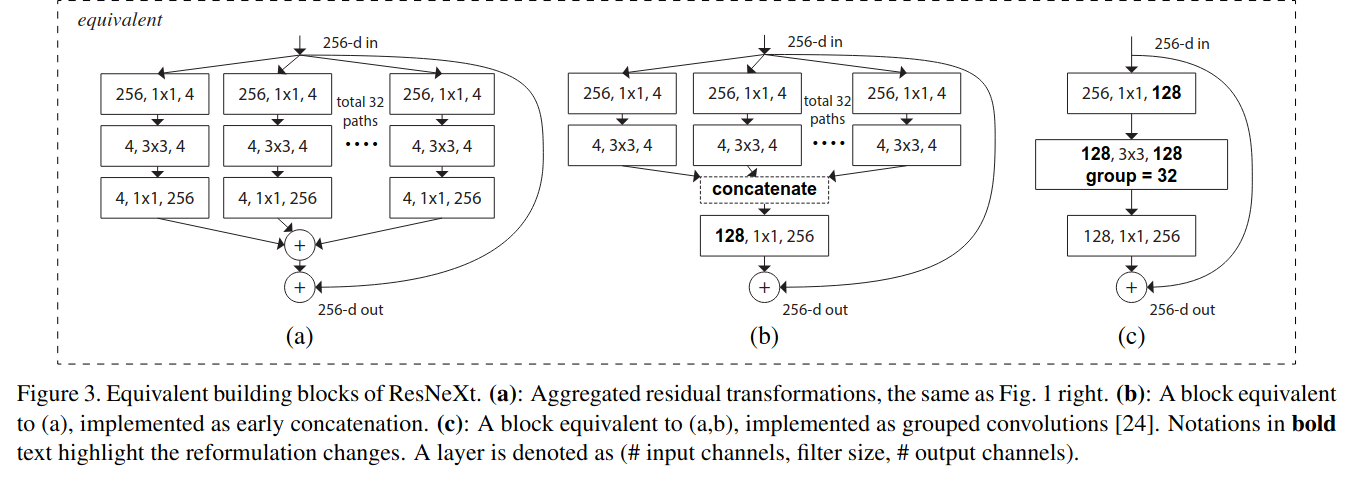

ResNeXt thay đổi kiến trúc của các khối residual trong ResNet bằng cách thêm **grouped convolutions**. Điều này làm cho mạng có nhiều nhánh song song trong mỗi khối residual, và đầu ra của các nhánh này sẽ được tổng hợp lại thông qua phép cộng.

Ví dụ, nếu một khối residual của ResNet có 256 bộ lọc, thì trong ResNeXt, khối này có thể được chia thành 32 nhánh, mỗi nhánh có 8 bộ lọc.

## Lợi ích của ResNeXt:
- **Khả năng biểu diễn cao hơn**: Nhờ grouped convolutions và cardinality cao, ResNeXt có thể học được nhiều đặc trưng phong phú mà không cần tăng số lượng kênh hoặc độ sâu.
- **Hiệu suất tốt hơn**: ResNeXt đạt được hiệu suất cao hơn với chi phí tính toán thấp hơn hoặc tương đương so với ResNet truyền thống có cùng số lớp.

## Thí nghiệm và kết quả của tác giả

Trong phần thí nghiệm, tác giả đã tiến hành các thí nghiệm trên bộ dữ liệu **ImageNet-1K** với nhiệm vụ phân loại hình ảnh có 1000 lớp. Họ sử dụng hai mô hình **ResNet-50** và **ResNet-101**, sau đó thay thế các khối residual của ResNet bằng khối residual được xây dựng theo kiến trúc của ResNeXt.

### 5.1 Thí nghiệm trên ImageNet-1K

- Thí nghiệm được thực hiện với mục tiêu đánh giá tác động của các yếu tố **Cardinality** và **Width** (bề rộng) trong việc giảm lỗi phân loại. 
- Ví dụ, một mô hình ResNeXt-50 được xây dựng với **Cardinality** = 32 và **bottleneck width** = 4d.

#### **Cardinality vs Width**

- Các kết quả thí nghiệm cho thấy rằng **Cardinality** (số nhánh trong mạng) giúp giảm lỗi phân loại hơn so với việc mở rộng bề rộng mạng.
  - **ResNeXt-50** $(32 \times 4d)$ có lỗi phân loại 22.2%, giảm 1.7% so với ResNet-50 ban đầu (23.9%).
  - Khi tăng **Cardinality** từ 1 đến 32 nhưng giữ nguyên độ phức tạp, lỗi phân loại tiếp tục giảm.
  
#### **Increasing Cardinality vs. Deeper/Wider**

- Khi tăng **Cardinality** giúp giảm lỗi phân loại tốt hơn so với việc chỉ làm sâu hoặc rộng mạng.
- Thí nghiệm so sánh các biến thể như:
  - **Going deeper**: tăng độ sâu lên 200 lớp (ResNet-200).
  - **Going wider**: tăng bề rộng bottleneck.
  - **Increasing cardinality**: nhân đôi **Cardinality**.

- **ResNeXt-101** $(32 \times 4d)$ đã đạt được hiệu suất tốt hơn với **21.2%** so với ResNet-200 (21.7%) và mạng rộng ResNet-101 (21.4%), mặc dù phức tạp chỉ bằng một nửa.

#### **Residual Connections**

- Tác giả cũng kiểm tra tác động của các kết nối residual. Kết quả cho thấy việc loại bỏ các kết nối residual trong ResNeXt-50 làm tăng lỗi phân loại từ 22.2% lên 26.1%.

#### **Hiệu suất**

- Tác giả sử dụng **Torch** với **grouped convolution** mà không tối ưu hóa đặc biệt.
- Việc huấn luyện $ResNeXt-101 (32 \times 4d)$ trên 8 GPU của NVIDIA M40 tiêu tốn khoảng 0.95s cho mỗi mini-batch, so với 0.70s của ResNet-101.
  
#### **So sánh với các mô hình state-of-the-art**

- Kết quả kiểm tra đơn hình ảnh trên bộ dữ liệu ImageNet-1K cho thấy ResNeXt đã so sánh tốt với các mô hình khác như **Inception-v3** và **Inception-ResNet-v2**.
- **ResNeXt** đạt được tỷ lệ lỗi top-1 là **20.4\%** và lỗi top-5 là **4.4\%** cho kích thước ảnh $299 \times 299$, vượt qua các mô hình **Inception** với độ phức tạp thấp hơn.

### 5.2. Thí nghiệm trên ImageNet-5K

Hiệu suất trên ImageNet-1K có vẻ đã bão hòa. Tuy nhiên, các tác giả lập luận rằng điều này không phải do giới hạn của mô hình mà là do độ phức tạp của tập dữ liệu. Do đó, để đánh giá mô hình chính xác hơn, họ đã thực hiện thí nghiệm trên một tập con lớn hơn của ImageNet gọi là ImageNet-5K, bao gồm 5000 hạng mục.

- **Chi tiết về tập dữ liệu**:
  - Tập 5K là tập con của ImageNet-22K.
  - Tập này gồm 5000 hạng mục, bao gồm 1000 hạng mục gốc của ImageNet-1K và 4000 hạng mục có nhiều hình ảnh nhất trong tập dữ liệu ImageNet đầy đủ.
  - Tập 5K có 6.8 triệu hình ảnh, lớn gấp 5 lần so với tập ImageNet-1K.
  - Đánh giá được thực hiện trên tập kiểm tra ImageNet-1K bằng cách coi mô hình 5K là nhiệm vụ phân loại 5 chiều (với các hạng mục 4000 còn lại được tự động coi là sai) hoặc phân loại 1K.

- **Kết quả**:
  - **ResNeXt-50** giảm 3.2% tỷ lệ lỗi top-1 trong nhiệm vụ 5K so với ResNet-50, và **ResNeXt-101** giảm 2.3% lỗi top-1 so với ResNet-101.
  - Mô hình được huấn luyện trên tập 5K có thể cạnh tranh với những mô hình huấn luyện trên tập 1K khi được đánh giá cùng trên nhiệm vụ phân loại 1K.
  - Kết quả này rất hứa hẹn, cho thấy rằng nhiệm vụ phân loại 5K có độ phức tạp lớn hơn nhiều so với 1K.

### 5.3. Thí nghiệm trên CIFAR

Các tác giả cũng thực hiện thí nghiệm trên các tập dữ liệu CIFAR-10 và CIFAR-100 để kiểm chứng hiệu quả của ResNeXt trong một ngữ cảnh khác:

- **Kiến trúc**:
  - Các mạng có cấu trúc tương tự với mô hình cơ sở ResNet.
  - Mô hình cơ sở bao gồm ba tầng, mỗi tầng có ba khối residual và kết thúc bằng một lớp fully-connected.

- **Đánh giá**:
  - Hai trường hợp được đánh giá:
    1. **Tăng cường độ đa chiều (cardinality)** và giữ cố định độ rộng (width).
    2. **Tăng độ rộng** và giữ cố định cardinality.
  - Kết quả cho thấy việc tăng cardinality hiệu quả hơn trong việc giảm lỗi so với việc tăng độ rộng, tương tự như kết quả đã thấy trên ImageNet-1K.
  - Kết quả cho thấy tỷ lệ lỗi **3.58%** trên CIFAR-10 và **17.31%** trên CIFAR-100, đạt mức tiên tiến nhất.

### 5.4. Thí nghiệm trên COCO Object Detection

Các tác giả cũng kiểm tra khả năng tổng quát hóa của ResNeXt trên tập dữ liệu phát hiện đối tượng COCO:

- **Huấn luyện**:
  - Các mô hình được huấn luyện trên tập huấn luyện 80K và đánh giá trên tập kiểm tra 5K.
  - Các mô hình được huấn luyện trước trên ImageNet-1K và sau đó tinh chỉnh trên tập phát hiện COCO.

- **Kết quả**:
  - Trên mô hình 50 lớp, ResNeXt cải thiện **AP@0.5 lên 2.1%** và **AP lên 1.0%** so với ResNet mà không tăng độ phức tạp.
  - ResNeXt cho thấy cải thiện nhỏ hơn trên mô hình 101 lớp.

- **Ứng dụng trong các mô hình khác**:
  - Gần đây, ResNeXt đã được áp dụng trong **Mask R-CNN** và đạt được kết quả tiên tiến nhất trong phân đoạn và phát hiện đối tượng.


### Kết luận

- Các thử nghiệm của tác giả chứng minh rằng việc tăng **Cardinality** là phương pháp hiệu quả nhất trong việc tăng độ chính xác phân loại, tốt hơn so với việc mở rộng bề rộng hay làm sâu mạng.
- **ResNeXt** mang lại hiệu suất cao hơn với độ phức tạp thấp hơn, và đóng góp vào thành công của nhóm nghiên cứu khi đạt vị trí thứ 1 trong cuộc thi **ILSVRC 2016**.





# Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResNeXtBlock(nn.Module):
    def __init__(self, in_channels, out_channels, cardinality, stride=1, downsample=None):
        super(ResNeXtBlock, self).__init__()
        D = out_channels // 2  # Reduce the number of filters by 2 for the block
        self.conv1 = nn.Conv2d(in_channels, D * cardinality, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(D * cardinality)
        
        self.conv2 = nn.Conv2d(D * cardinality, D * cardinality, kernel_size=3, stride=stride, padding=1, groups=cardinality, bias=False)
        self.bn2 = nn.BatchNorm2d(D * cardinality)
        
        self.conv3 = nn.Conv2d(D * cardinality, out_channels, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)
        
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNeXt(nn.Module):
    def __init__(self, block, layers, cardinality=32, num_classes=10):
        super(ResNeXt, self).__init__()
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        
        self.layer1 = self._make_layer(block, 128, layers[0], cardinality, stride=1)
        self.layer2 = self._make_layer(block, 256, layers[1], cardinality, stride=2)
        self.layer3 = self._make_layer(block, 512, layers[2], cardinality, stride=2)
        self.layer4 = self._make_layer(block, 1024, layers[3], cardinality, stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(1024, num_classes)

    def _make_layer(self, block, out_channels, blocks, cardinality, stride):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, cardinality, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels, cardinality))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x


def ResNeXt50(cardinality=32, num_classes=10):
    return ResNeXt(ResNeXtBlock, [3, 4, 6, 3], cardinality, num_classes)


# Kiểm tra mô hình ResNeXt50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNeXt50().to(device)

# Đầu vào ngẫu nhiên
x = torch.randn(1, 3, 224, 224).to(device)
output = model(x)
print(output.shape)  # Phải trả về (1, 10) nếu số lớp là 10


# The Reversible Residual Network: Backpropagation Without Storing Activations (2017)

##  1.Introduction

Trong các năm qua, các mạng nơ-ron tích chập sâu đã mang lại những cải tiến vượt bậc trong nhiều nhiệm vụ xử lý hình ảnh. Đặc biệt, các mạng như ResNet (Residual Networks) đã trở thành kiến trúc tiêu chuẩn cho nhiều bài toán thị giác máy tính. Điểm đột phá của ResNet là khối dư thừa (residual block), cho phép thông tin được truyền trực tiếp qua mạng, giúp các tín hiệu lan truyền ngược ít bị ảnh hưởng bởi hiện tượng gradient bùng nổ hoặc triệt tiêu. Điều này đã cho phép huấn luyện các mạng có hàng trăm lớp với hiệu suất đáng kể.

Tuy nhiên, hầu hết các mạng hiện đại đều yêu cầu lưu trữ các kết quả trung gian (activations) trong quá trình lan truyền ngược. Việc này dẫn đến chi phí bộ nhớ lớn, đặc biệt khi mạng ngày càng sâu và rộng. Sự gia tăng này làm tăng gánh nặng bộ nhớ, trở thành rào cản trong các ứng dụng đòi hỏi tài nguyên lớn. GPU có giới hạn về dung lượng bộ nhớ, và một số kiến trúc hiện đại có thể cần tới hàng ngàn lớp, điều này gây khó khăn trong quá trình huấn luyện do cần phải phân chia dữ liệu qua nhiều GPU, vốn đắt đỏ và phức tạp để triển khai.

RevNet được giới thiệu như một giải pháp giúp giảm thiểu chi phí bộ nhớ này. RevNet là một biến thể của ResNet, trong đó các kết quả trung gian của mỗi lớp có thể được khôi phục từ lớp tiếp theo. Nhờ vào tính chất có thể đảo ngược này, quá trình lan truyền ngược có thể diễn ra mà không cần phải lưu trữ các kết quả trung gian của toàn bộ các lớp trong mạng. Điều này giúp giảm đáng kể lượng bộ nhớ cần thiết, độc lập với độ sâu của mạng. Kết quả là, RevNet vẫn đạt hiệu suất gần như tương đương ResNet trên các tập dữ liệu như CIFAR-10, CIFAR-100, và ImageNet, dù chi phí bộ nhớ giảm đáng kể và chỉ tăng nhẹ thời gian huấn luyện.

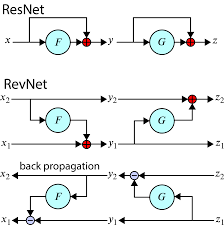

## 2 Kiến trúc đảo ngược (Reversible Architectures)

Kiến trúc mạng nơ-ron đảo ngược (Reversible Neural Networks) là các mô hình có khả năng tái tạo đầu vào từ đầu ra, giúp tiết kiệm bộ nhớ trong quá trình huấn luyện bằng cách không cần lưu trữ tất cả các kết quả trung gian. Việc này rất quan trọng khi huấn luyện các mô hình mạng nơ-ron sâu có nhiều lớp.

### NICE (Nonlinear Independent Components Estimation)

NICE là một phương pháp học máy không giám sát dựa trên việc học một phép biến đổi song ánh phi tuyến giữa không gian dữ liệu và không gian tiềm ẩn. Các lớp trong NICE có thể được đảo ngược, điều này có nghĩa là chúng ta có thể tái tạo đầu vào từ đầu ra, giúp giảm yêu cầu lưu trữ trong bộ nhớ.

Phép biến đổi chính của NICE có dạng:
$$
y_1 = x_1
$$
$$
y_2 = x_2 + \mathcal{F}(x_1)
$$
Với $x_1$ và $x_2$ là đầu vào, $y_1$ và $y_2$ là đầu ra sau khi qua các lớp của mạng. Do kiến trúc này là khả nghịch (invertible), chúng ta có thể tính toán lại $x_1$ và $x_2$ từ $y_1$ và $y_2$, điều này giúp tiết kiệm bộ nhớ.

### Hạn chế của NICE

Tuy nhiên, NICE có một hạn chế là chỉ có thể biểu diễn các phép biến đổi bảo toàn thể tích (volume-preserving mappings). Điều này giới hạn khả năng biểu diễn của mạng khi cần thay đổi kích thước không gian dữ liệu.

### Phép biến đổi nâng cao

Để khắc phục hạn chế này, Dinh et al. đã giới thiệu một phép biến đổi mới có dạng:
$$
y_1 = x_1
$$
$$
y_2 = x_2 \odot \exp(\mathcal{F}(x_1)) + \mathcal{G}(x_1)
$$
Trong đó:
- $ \odot $ là phép nhân Hadamard (nhân theo từng phần tử).
- $\exp(\mathcal{F}(x_1))$ là hàm mũ của $\mathcal{F}(x_1)$.

Phép biến đổi này giúp mở rộng khả năng của mạng, cho phép mạng học được các phép ánh xạ phi tuyến không bảo toàn thể tích, từ đó tăng cường tính linh hoạt của mạng.

### Kết luận

Kiến trúc đảo ngược giúp tiết kiệm bộ nhớ khi huấn luyện các mô hình sâu, và các phép biến đổi nâng cao giúp khắc phục hạn chế của các phép biến đổi bảo toàn thể tích, mở ra hướng đi mới cho việc tối ưu hóa bộ nhớ trong các mô hình lớn.

---

## 3. Methods

### 3.1 Reversible Residual Networks

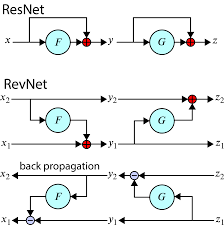

RevNets được cấu thành từ các khối đảo ngược (reversible blocks). Mỗi khối đảo ngược chia đầu vào của lớp thành hai phần, được ký hiệu là $x_1$ và $x_2$. Đối với mỗi khối, đầu ra $y_1$ và $y_2$ được tính như sau:

$$
y_1 = x_1 + \mathcal{F}(x_2)
$$
$$
y_2 = x_2 + \mathcal{G}(y_1)
$$

Các hàm $\mathcal{F}$ và $\mathcal{G}$ đóng vai trò giống như các hàm dư (residual functions) trong ResNet, giúp thông tin được truyền qua mạng.

Mô hình này có khả năng **tái tạo lại** đầu vào từ đầu ra thông qua các phương trình ngược:

$$
x_2 = y_2 - \mathcal{G}(y_1)
$$
$$
x_1 = y_1 - \mathcal{F}(x_2)
$$

Điều này có nghĩa là ta không cần lưu trữ toàn bộ các kết quả trung gian (activations) trong bộ nhớ vì có thể tính lại chúng từ đầu ra của các lớp sau. Đây là điểm mạnh của RevNet so với ResNet trong việc tiết kiệm bộ nhớ.

Một điểm lưu ý là các khối đảo ngược chỉ hoạt động khi lớp có stride bằng 1, vì nếu stride khác 1, một phần thông tin sẽ bị mất và không thể đảo ngược hoàn toàn. Do đó, để có thể huấn luyện hiệu quả với stride lớn hơn 1, các lớp không đảo ngược phải được sử dụng.

### 3.2 Backpropagation Without Storing Activations

Để thực hiện quá trình lan truyền ngược (backpropagation) mà không cần lưu trữ các kết quả trung gian, quá trình tính toán có thể được viết lại như sau:

#### Truyền tiến (Forward pass):
$$
z_1 = x_1 + \mathcal{F}(x_2)
$$
$$
y_2 = x_2 + \mathcal{G}(z_1)   \tag{8}
$$
$$
y_1 = z_1
$$

#### Truyền ngược (Reverse pass):
$$
x_2 = y_2 - \mathcal{G}(z_1)  
$$

$$
x_1 = z_1 - \mathcal{F}(x_2) 
$$

Ngay cả khi $z_1 = y_1$, các biến $z_1$ và $y_1$ đại diện cho hai nút khác nhau trong đồ thị tính toán, vì tổng đạo hàm của chúng khác nhau. Điều này cho phép chúng ta tính toán lan truyền ngược theo cách từng bước mà không cần lưu trữ tất cả giá trị trung gian.

#### Áp dụng thuật toán này:

Bằng cách áp dụng thuật toán này, chúng ta có thể thực hiện lan truyền ngược trên một chuỗi các khối đảo ngược chỉ với việc lưu trữ đầu ra cuối cùng của lớp và đạo hàm của chúng. Điều này giúp tiết kiệm bộ nhớ đáng kể, đặc biệt là đối với các mạng sâu như ResNet. Mặc dù vậy, một số lớp không thể đảo ngược, chẳng hạn như các lớp pooling với stride lớn hơn 1, vẫn cần được lưu trữ.

Nhìn chung, kiến trúc RevNet cho phép huấn luyện các mô hình với chiều sâu lớn mà không tốn quá nhiều bộ nhớ, vì không cần lưu trữ tất cả kết quả trung gian của các lớp trong quá trình lan truyền ngược.

#### Computational Overhead

Khi thực hiện quá trình lan truyền tiến (forward pass) và lan truyền ngược (backpropagation) trong một mạng nơ-ron thông thường, số lượng phép toán cộng và nhân cần thiết sẽ tỉ lệ với số kết nối $N$ trong mạng, với khoảng $N$ phép cộng và $2N$ phép nhân cho mỗi lần lan truyền ngược. Tuy nhiên, trong RevNet, các hàm dư thừa phải được tính toán lại trong quá trình lan truyền ngược, khiến tổng số phép toán cần thực hiện tăng lên khoảng $4N$. Điều này khiến chi phí tính toán của RevNet lớn hơn backpropagation thông thường khoảng 33%, và trên các hệ thống GPU, chi phí này có thể tăng đến 50% do việc tái tính toán các hàm dư thừa.

#### Thuật toán 1: Reversible Residual Block Backprop

Quá trình lan truyền ngược cho khối dư thừa đảo ngược (reversible residual block) có thể được mô tả bằng các bước sau:

1. Hàm $BLOCKREVERSE((y_1, y_2), (\overline{y_1}, \overline{y_2}))$:
    1. $z_1 \leftarrow y_1$
    2. $x_2 \leftarrow y_2 - \mathcal{G}(z_1)$
    3. $x_1 \leftarrow z_1 - \mathcal{F}(x_2)$
    4. $\overline{z_1} \leftarrow \overline{y_1} + \left(\frac{\partial \mathcal{G}}{\partial z_1}\right)^{T} \overline{y_2}$
    5. $\overline{x_2} \leftarrow \overline{y_2} + \left(\frac{\partial \mathcal{F}}{\partial x_2}\right)^{T} \overline{z_1}$
    6. $\overline{x_1} \leftarrow \overline{z_1}$
    7. $w_{\mathcal{F}} \leftarrow \frac{\partial \mathcal{F}}{\partial w_{\mathcal{F}}} \overline{z_1}$
    8. $w_{\mathcal{G}} \leftarrow \frac{\partial \mathcal{G}}{\partial w_{\mathcal{G}}} \overline{y_2}$
2. Trả về $(x_1, x_2)$ và $(\overline{x_1}, \overline{x_2})$ cùng với các gradient $w_{\mathcal{F}}$ và $w_{\mathcal{G}}$.

#### Modularity

Thuật toán này được thiết kế theo mô hình module, tức là nó không phụ thuộc vào các hàm dư thừa cụ thể $\mathcal{F}$ và $\mathcal{G}$. Điều này có nghĩa là bạn có thể sử dụng bất kỳ hàm dư thừa nào trong mô hình của mình mà không cần phải thay đổi cấu trúc tổng thể của thuật toán. Các bước tính toán gradient trong quá trình lan truyền ngược có thể được tự động hóa bằng cách sử dụng các thư viện như `tf.gradients` (TensorFlow) hoặc `Theano.grad`. Do đó, mặc dù việc triển khai thuật toán đòi hỏi một số cài đặt thủ công, nhưng không cần phải thay đổi cách tính các hàm dư thừa để áp dụng thuật toán này.

#### Numerical Error

Quá trình tái tạo các giá trị trung gian (activations) theo phương trình 8 có thể dẫn đến việc tích lũy sai số số học, đặc biệt khi sử dụng định dạng số `float32` phổ biến. Sai số này có thể nhỏ và không ảnh hưởng lớn đến hiệu suất tổng thể, nhưng nếu sai số tích lũy nhiều, có thể sử dụng số học cố định (fixed-point arithmetic) cho các biến $x$ và $y$, trong khi vẫn giữ các hàm dư thừa $\mathcal{F}$ và $\mathcal{G}$ dưới dạng số học dấu phẩy động (floating-point). Điều này sẽ giảm thiểu sai số mà không làm tăng đáng kể chi phí tính toán.

## 4. Thí nghiệm

Trong phần thí nghiệm, nhóm tác giả đã kiểm tra hiệu suất của RevNet trên ba bộ dữ liệu phân loại hình ảnh tiêu chuẩn: CIFAR-10, CIFAR-100 và ImageNet. Mục tiêu là so sánh RevNet với ResNet về cả độ sâu tính toán và số lượng tham số để đảm bảo kết quả so sánh công bằng nhất. Thay vì giữ nguyên toàn bộ kiến trúc, nhóm tác giả đã nhận thấy rằng mỗi khối đảo ngược (reversible block) trong RevNet thực hiện được tương đương hai khối dư thừa trong ResNet. Do đó, họ giảm số lượng khối xuống một nửa và tăng gấp đôi số lượng kênh trong mỗi khối, từ đó giữ được độ phức tạp của mô hình nhưng tối ưu hơn về cách thức tính toán.

### 4.1 Hiệu suất của RevNet

Kết quả cho thấy RevNet đạt hiệu suất gần như tương đương với ResNet trên cả ba bộ dữ liệu thử nghiệm. Thậm chí, RevNet còn cho thấy khả năng vượt trội hơn ResNet trong một số trường hợp, với chênh lệch độ chính xác không quá 0.5%. Điều này cho thấy RevNet là một giải pháp tốt trong việc tiết kiệm bộ nhớ mà không làm giảm hiệu suất. Một điểm bất ngờ là khả năng đảo ngược của RevNet - một yếu tố có thể làm giảm khả năng mô hình - không ảnh hưởng đáng kể đến độ chính xác của mô hình trong các thử nghiệm.

#### 4.2 Tác động của sai số số học

Khi sử dụng các phép toán tái tạo lại kết quả trung gian (activations), có thể xảy ra sai số số học khi thực hiện qua nhiều lớp. Trong thí nghiệm, các tác giả đã kiểm tra góc lệch giữa các gradient được tính từ các kết quả lưu trữ và gradient từ các kết quả được tái tạo. Mặc dù sai số này tăng dần trong quá trình huấn luyện, nhưng vẫn rất nhỏ và không ảnh hưởng đến kết quả cuối cùng. Do đó, quá trình tái tạo kết quả trong RevNet là ổn định và có thể sử dụng mà không gặp phải các vấn đề về sai số nghiêm trọng.

## 6. Kết luận và công việc trong tương lai

Từ các thí nghiệm trên, nhóm tác giả đã chứng minh rằng RevNet có thể tiết kiệm rất nhiều bộ nhớ mà vẫn giữ nguyên được hiệu suất mô hình tương tự ResNet. Điều này là một bước tiến quan trọng, đặc biệt khi huấn luyện các mô hình rất sâu mà không yêu cầu bộ nhớ lớn để lưu trữ tất cả các kết quả trung gian.

RevNet là một giải pháp rất hiệu quả khi cần tiết kiệm bộ nhớ cho việc huấn luyện các mạng nơ-ron sâu mà vẫn giữ được hiệu suất tính toán tương tự như ResNet. Mặc dù chi phí tính toán có thể tăng thêm một chút (33% đến 50%), lợi ích về tiết kiệm bộ nhớ rất lớn và có thể trở nên quan trọng trong các bài toán yêu cầu nhiều tài nguyên tính toán, đặc biệt là trên các hệ thống có bộ nhớ giới hạn như GPU.

Trong tương lai, nhóm tác giả dự định áp dụng RevNet vào các bài toán phân đoạn ngữ nghĩa (semantic segmentation), nơi yêu cầu bộ nhớ lớn để xử lý các hình ảnh có độ phân giải cao. Họ cũng muốn mở rộng nghiên cứu sang mạng nơ-ron hồi quy đảo ngược (reversible recurrent neural networks), nơi việc chia sẻ trọng số có thể giúp giảm thiểu chi phí bộ nhớ hơn nữa, một bài toán quan trọng khi làm việc với các chuỗi thời gian dài.





# 6. Implementation

# Wide Residual Networks - 2017

# Implementation

In [2]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    def __init__(self, in_planes, out_planes, stride, dropRate=0.0):
        super(BasicBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_planes)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.droprate = dropRate
        self.equalInOut = (in_planes == out_planes)
        self.convShortcut = (not self.equalInOut) and nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride,
                               padding=0, bias=False) or None
    def forward(self, x):
        if not self.equalInOut:
            x = self.relu1(self.bn1(x))
        else:
            out = self.relu1(self.bn1(x))
        out = self.relu2(self.bn2(self.conv1(out if self.equalInOut else x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, training=self.training)
        out = self.conv2(out)
        return torch.add(x if self.equalInOut else self.convShortcut(x), out)

class NetworkBlock(nn.Module):
    def __init__(self, nb_layers, in_planes, out_planes, block, stride, dropRate=0.0):
        super(NetworkBlock, self).__init__()
        self.layer = self._make_layer(block, in_planes, out_planes, nb_layers, stride, dropRate)
    def _make_layer(self, block, in_planes, out_planes, nb_layers, stride, dropRate):
        layers = []
        for i in range(int(nb_layers)):
            layers.append(block(i == 0 and in_planes or out_planes, out_planes, i == 0 and stride or 1, dropRate))
        return nn.Sequential(*layers)
    def forward(self, x):
        return self.layer(x)

class WideResNet(nn.Module):
    def __init__(self, depth, num_classes, widen_factor=1, dropRate=0.0):
        super(WideResNet, self).__init__()
        nChannels = [16, 16*widen_factor, 32*widen_factor, 64*widen_factor]
        assert((depth - 4) % 6 == 0)
        n = (depth - 4) / 6
        block = BasicBlock
        # 1st conv before any network block
        self.conv1 = nn.Conv2d(3, nChannels[0], kernel_size=3, stride=1,
                               padding=1, bias=False)
        # 1st block
        self.block1 = NetworkBlock(n, nChannels[0], nChannels[1], block, 1, dropRate)
        # 2nd block
        self.block2 = NetworkBlock(n, nChannels[1], nChannels[2], block, 2, dropRate)
        # 3rd block
        self.block3 = NetworkBlock(n, nChannels[2], nChannels[3], block, 2, dropRate)
        # global average pooling and classifier
        self.bn1 = nn.BatchNorm2d(nChannels[3])
        self.relu = nn.ReLU(inplace=True)
        self.fc = nn.Linear(nChannels[3], num_classes)
        self.nChannels = nChannels[3]

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.bias.data.zero_()
    def forward(self, x):
        out = self.conv1(x)
        out = self.block1(out)
        out = self.block2(out)
        out = self.block3(out)
        out = self.relu(self.bn1(out))
        out = F.avg_pool2d(out, 8)
        out = out.view(-1, self.nChannels)
        return self.fc(out)

# Constrained Linear Data-feature Mapping for Image Classification

## 1. Tóm tắt
Bài báo này đề xuất một mô hình ánh xạ dữ liệu-đặc trưng tuyến tính bị ràng buộc như một mô hình toán học có thể diễn giải cho bài toán phân loại ảnh, sử dụng mạng nơ-ron tích chập (CNN), đặc biệt là các mô hình ResNet. Từ quan điểm này, các tác giả xây dựng mối liên kết chi tiết giữa các sơ đồ lặp lại truyền thống cho hệ tuyến tính bị ràng buộc và kiến trúc của các khối cơ bản trong ResNet. Một số sửa đổi tự nhiên của các mô hình ResNet cũng được đề xuất nhằm giảm số lượng tham số mà vẫn duy trì độ chính xác gần tương đương với các mô hình gốc.

## 2. Giới thiệu
Bài báo này cung cấp cái nhìn sâu sắc về mặt toán học cho các mạng nơ-ron tích chập sâu (CNN), đặc biệt là các mô hình ResNet và pre-act ResNet. Giả định cốt lõi của mô hình là có một ánh xạ dữ liệu-đặc trưng, được biểu diễn như sau:

$$
A * u = f, \tag{1.1}
$$

trong đó $f$ đại diện cho dữ liệu (ví dụ: hình ảnh), và $u$ đại diện cho tensor đặc trưng.

### 2.1. Quá trình trích xuất đặc trưng
Quá trình trích xuất đặc trưng được coi như một quá trình lặp lại, được định nghĩa như sau:

$$
u^i = u^{i-1} + B^i * (f - A * u^{i-1}), \tag{1.2}
$$

trong đó $B^i$ đại diện cho trọng số. Khi sử dụng hàm kích hoạt $\sigma(x) = \text{ReLU}(x) = \max\{0, x\}$, quá trình này được sửa đổi để bảo toàn ràng buộc:

$$
u^i = u^{i-1} + \sigma \circ B^i * \sigma(f - A * u^{i-1}). \tag{1.3}
$$

Quá trình lặp lại này có thể so sánh với một thành phần cốt lõi của mô hình pre-act ResNet.

### 2.2. Ánh xạ residual
Giới thiệu thành phần residual:

$$
r^i = f - A * u^i, \tag{1.4}
$$

quá trình lặp lại trở thành:

$$
r^i = r^{i-1} - A * \sigma \circ B^i * \sigma(r^{i-1}). \tag{1.5}
$$

Quá trình này biểu diễn một mô hình pre-act ResNet đã được sửa đổi.

### 2.3. Quan sát
Hai quan sát chính được rút ra khi so sánh các phương trình $(1.4)$ và $(1.5)$:

1. $A^i$ trong pre-act ResNet phụ thuộc vào $i$, trong khi $A$ trong pre-act ResNet sửa đổi không phụ thuộc vào $i$.
2. ResNet cổ điển có thể được liên hệ với các phương pháp lặp lại truyền thống để giải các hệ phương trình.

### 2.4. Đóng góp
Các đóng góp chính của bài báo này là:
1. Đề xuất và phát triển giả định ánh xạ dữ liệu-đặc trưng tuyến tính bị ràng buộc như một mô hình có thể diễn giải cho các mô hình ResNet.
2. Đề xuất một số sửa đổi tự nhiên của các mô hình ResNet nhằm giảm số lượng tham số trong khi vẫn duy trì hiệu suất.
3. Cung cấp cả bằng chứng lý thuyết và thực nghiệm để chứng minh hiệu quả của mô hình đã đề xuất.

## 3. Liên hệ giữa phương pháp Mapping dữ liệu-đặc trưng và phương pháp Multigrid

### 3.1 Mối liên hệ giữa các kiến trúc CNN và Multigrid

Trong bài báo, tác giả chỉ ra rằng có một mối liên hệ rõ ràng giữa các kiến trúc mạng nơ-ron tích chập sâu (**CNN**) và các phương pháp giải hệ phương trình tuyến tính trong toán học tính toán, đặc biệt là phương pháp **Multigrid**. Phương pháp này thường được sử dụng để giải các bài toán tuyến tính lớn và phức tạp.

Phương trình tuyến tính cơ bản có dạng:

$$ A * u = f $$

Trong đó:
- $A$ là ma trận biểu diễn quá trình biến đổi,
- $u$ là vector đặc trưng cần học,
- $f$ là dữ liệu đầu vào.

#### MgNet: Mô hình kết hợp giữa CNN và Multigrid

Tác giả đã liên hệ **MgNet**, sử dụng các phép lặp tuyến tính trong quá trình học đặc trưng từ dữ liệu. Phương trình lặp được áp dụng cho quá trình học là:

$$ u^i = u^{i-1} + B^i * (f - A * u^{i-1}) $$

Phương trình trên mô tả cách mỗi bước lặp cập nhật vector đặc trưng $u$ dựa trên dữ liệu và ma trận $A$, tương tự như cách phương pháp Multigrid xử lý bài toán tuyến tính. Mô hình này giúp CNN, đặc biệt là **ResNet**, tận dụng được sức mạnh tính toán của Multigrid, từ đó cải thiện độ chính xác và giảm độ phức tạp mô hình.

#### Làm rõ:

- Phương pháp **Multigrid** vốn được sử dụng trong các bài toán giải phương trình vi phân, nhưng trong nghiên cứu này, tác giả đã áp dụng nó vào CNN để cải thiện hiệu suất tính toán qua nhiều tầng của mạng. Điều này có nghĩa là thay vì xử lý qua từng tầng một cách tuần tự, mạng sẽ truyền tín hiệu qua nhiều lớp một cách hiệu quả hơn.
- Nhờ sự kết hợp giữa **CNN** và **Multigrid**, MgNet có thể duy trì độ chính xác cao nhưng đồng thời giảm được sự phức tạp về mặt tính toán.

---

### 3.2 Liên hệ giữa CNN và hệ động lực học

#### CNN như một hệ động lực học

Một số nghiên cứu trước đây đã chỉ ra rằng các mạng sâu, đặc biệt là **ResNet**, có liên hệ chặt chẽ với các hệ thống động lực (**dynamic systems**). Điều này có nghĩa là quá trình cập nhật trạng thái của mạng qua các tầng tương tự như cách giải các phương trình vi phân thông qua **sơ đồ Euler tiến**.

Phương trình cập nhật trạng thái của ResNet có dạng:

$$ x^i = x^{i-1} + f(x^{i-1}) $$

Trong đó:
- $x^i$ là trạng thái của tầng thứ $i$,
- $f(x)$ là hàm số biểu diễn quá trình học đặc trưng.

#### Làm rõ:

- Sự liên kết này cho thấy rằng các kiến trúc CNN, đặc biệt là ResNet, không chỉ đơn thuần là một mô hình học sâu mà còn có thể được xem như một cách tiếp cận để giải phương trình vi phân.
- Mỗi bước cập nhật trạng thái trong mạng rất giống với việc giải phương trình vi phân bằng phương pháp Euler tiến, trong đó trạng thái hiện tại được điều chỉnh dựa trên trạng thái của tầng trước đó.

#### Ý nghĩa thực tiễn:

- Nhờ vào việc coi mạng nơ-ron như một hệ động lực học, các nhà nghiên cứu có thể tối ưu hóa quá trình học của mạng theo cách toán học và dễ hiểu hơn. Đồng thời, điều này mở ra khả năng áp dụng thêm nhiều phương pháp giải toán học để cải thiện các kiến trúc học sâu trong tương lai.
  

### Tóm tắt:
Tác giả của bài báo không chỉ trình bày các cải tiến về kiến trúc CNN mà còn cung cấp những góc nhìn mới dựa trên các công cụ toán học như phương pháp **Multigrid** và **hệ động lực học**. Những phát hiện này giúp giải thích tại sao các kiến trúc như ResNet lại hoạt động hiệu quả và mở ra hướng đi mới trong việc kết hợp giữa toán học và học sâu.

---

## 4. Modified Pre-act ResNet

Trong phần này của bài báo, tác giả đã đề xuất một số mô hình **ResNet** và **Pre-act ResNet** mới dựa trên giả định về phép ánh xạ dữ liệu-đặc trưng tuyến tính bị ràng buộc. Những mô hình này là các biến thể của ResNet tiêu chuẩn với những cải tiến nhằm tối ưu hóa kiến trúc mạng.

### Điểm chính trong phần Modified Pre-act ResNet:

1. **Giả định ánh xạ dữ liệu-đặc trưng**:
    - Dựa trên giả định rằng có một phép ánh xạ tuyến tính bị ràng buộc giữa dữ liệu và đặc trưng. Điều này giúp làm rõ cách các mô hình học đặc trưng từ dữ liệu.
    
2. **Biến đổi ResNet và Pre-act ResNet**:
    - Tác giả đề xuất các biến thể của ResNet và Pre-act ResNet với một sự thay đổi quan trọng là thêm ràng buộc:
    
    $$
    A^{\ell,i} = A^{\ell}
    $$
    
    - Điều này có nghĩa là ma trận ánh xạ \(A\) tại mỗi tầng của mạng là cố định qua các lần lặp.

3. **Sơ đồ lặp tuyến tính mới**:
    - Mô hình **Modified Pre-act ResNet** được biểu diễn với công thức:
    
    $$
    r^{\ell,i} = r^{\ell,i-1} + A^{\ell} * \sigma \circ B^{\ell,i} * \sigma (r^{\ell,i-1})
    $$
    
    - Trong công thức này, $A^{\ell}$ và $B^{\ell,i}$ là các ma trận được sử dụng để tính toán phép ánh xạ dữ liệu, trong đó $B^{\ell,i}$ có thể thay đổi theo mỗi lần lặp \(i\). 
    - Điều này khác với công thức của ResNet thông thường, nơi các phép ánh xạ thường không có ràng buộc cố định.

4. **Sơ đồ trực quan**:
    - Tác giả cung cấp một sơ đồ đơn giản hóa để mô tả các khối cơ bản của **Modified Pre-act ResNet** và **ResNet**. Sơ đồ này cho thấy sự khác biệt giữa hai mô hình qua việc bỏ qua các hàm kích hoạt và tập trung vào cấu trúc chính của mạng.

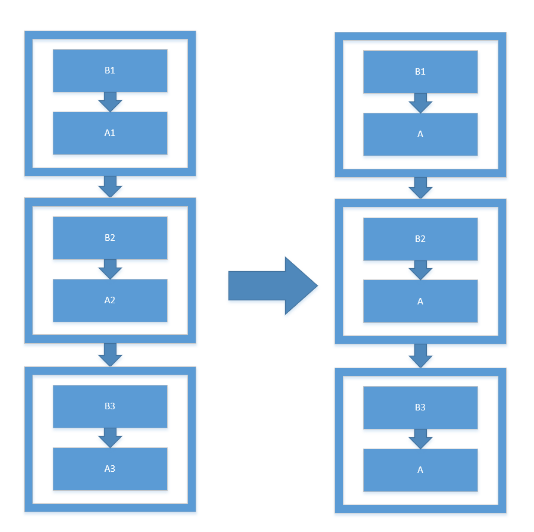

5. **Ý nghĩa của cải tiến**:
    - Sự thay đổi này giúp tạo ra một mô hình ResNet và Pre-act ResNet với ít tham số hơn mà vẫn duy trì được hiệu suất tương tự so với các mô hình gốc. Bằng cách sử dụng phép lặp tuyến tính có ràng buộc, mô hình có thể giảm độ phức tạp trong việc học các đặc trưng, từ đó tối ưu hóa việc huấn luyện mô hình và cải thiện khả năng tổng quát hóa.

### Làm rõ nội dung:
- Phần cải tiến này tập trung vào việc giảm bớt số lượng tham số trong mô hình mà không làm giảm hiệu suất. Việc thêm các ràng buộc cố định lên ma trận ánh xạ giúp giảm độ phức tạp của mô hình, đồng thời làm rõ hơn quá trình học các đặc trưng trong mạng ResNet.
- Các biến thể này vẫn duy trì tính tương tự về cách truyền tín hiệu qua các tầng mạng, nhưng với việc điều chỉnh ma trận ánh xạ và thêm ràng buộc tuyến tính, mô hình có thể hoạt động hiệu quả hơn và giảm thiểu số lượng tham số cần thiết.


---

## 5. Linear versus Nonlinear Data-feature Mapping

Trong phần này, các tác giả muốn tìm hiểu tính hợp lý của giả thuyết về mô hình ánh xạ dữ liệu-đặc trưng tuyến tính bị ràng buộc. Chúng ta sẽ chỉ ra rằng mô hình ánh xạ dữ liệu-đặc trưng tuyến tính là đủ bằng cách so sánh với một số mô hình phi tuyến trên ánh xạ dữ liệu-đặc trưng.

### 5.1 Nonlinear Data-feature Mapping and Iterative Methods

Một trong những giả thuyết quan trọng ở trên là ánh xạ dữ liệu-đặc trưng (3.1) có thể là một mô hình tuyến tính, và chỉ nên có một mô hình duy nhất trong mỗi lưới. Để chứng minh rằng mô hình tuyến tính này là đủ cho việc phân loại hình ảnh, chúng ta so sánh với ánh xạ dữ liệu-đặc trưng phi tuyến sau:

$$
\mathcal{A}^{\ell}(u^\ell) = f^\ell,
$$
 
nơi mà $\mathcal{A}^{\ell}$ có thể được chọn cho một số dạng phi tuyến đặc biệt, chẳng hạn như $\mathcal{A}^{\ell} * \sigma$, $\sigma \circ \mathcal{A}^{\ell} * \sigma$, và $\sigma \circ \mathcal{A}^{\ell} * \sigma$. Sau đó, chúng ta có sơ đồ chiết xuất đặc trưng tiếp theo:

$$
u^{\ell,i} = u^{\ell,i-1} + \mathcal{B}^{\ell,i} * \left( f^\ell - \mathcal{A}^{\ell}(u^{\ell,i-1}) \right), \quad i = 1, \dots, \nu_\ell,
$$

với $\mathcal{B}^{\ell,i}$ cũng có thể nhận các dạng phi tuyến đặc biệt. Ở đây, chúng ta lưu ý rằng vì tính phi tuyến của $\mathcal{A}^{\ell}$, chúng ta không thể có sơ đồ lặp về phần dư cho phương trình (4.2). Chúng ta chỉ có thể thực hiện việc lặp lại trong không gian đặc trưng.

Do đó, chúng ta đề xuất kiến trúc ResNet dựa trên đặc trưng tiếp theo (FB-ResNet) trong **Algorithm 2**, bao gồm việc lặp lại các đặc trưng như trong (4.2) và một phép pooling đặc biệt (4.4).

#### Algorithm 2:

$$
u^{J,\ell}_J = \text{FB-ResNet}(f; J, \nu_1, \dots, \nu_J)
$$
1. Initialization: $f^1 = f_{\text{in}}(f), u^{1,0} = 0$
2. for $\ell = 1:J$ do:
3. for $i = 1: \nu_\ell$ do:
4. Feature extraction (smoothing):
   $$
   u^{\ell,i} = u^{\ell,i-1} + \mathcal{B}^{\ell,i} \left( f^\ell - \mathcal{A}^{\ell}(u^{\ell,i-1}) \right)
   $$
5. end for
6. Pooling (interpolation and restriction):
   $$
   u^{\ell+1,0} = \Pi^{\ell+1}_{\ell,*2} u^{\ell,\nu_\ell}
   $$
   $$
   f^{\ell+1} = R^{\ell+1}_{\ell,*2} \left( f^\ell - \mathcal{A}^{\ell}(u^{\ell,\nu_\ell}) + \mathcal{A}^{\ell+1}(u^{\ell+1,0}) \right)
   $$
7. end for

Ở đây (4.4) được hiểu như các toán tử nội suy và hạn chế khác nhau do sự khác biệt giữa không gian đặc trưng và không gian dữ liệu. Tuy nhiên, trong việc triển khai thực tế, tất cả đều được thực hiện bởi phép tích chập 3x3 với stride 2 dưới dạng $\Pi^{\ell+1}_{\ell,*2}$ và $R^{\ell+1}_{\ell,*2}$.

---

## 6. Discussion and Conclusion

Trong bài báo này, các tác giả đề xuất một mô hình ánh xạ dữ liệu-đặc trưng tuyến tính bị ràng buộc, giúp cung cấp một cái nhìn sâu hơn về cách các mô hình CNN như ResNet hoạt động trong việc phân loại hình ảnh. Mô hình này xây dựng trên các phương pháp lặp tuyến tính truyền thống, đồng thời kết hợp các khối cơ bản của kiến trúc pre-act ResNet để làm rõ cơ chế hoạt động của nó.

Tác giả đề xuất một mô hình toán học cho CNN như ResNet, được hiểu theo dạng một hệ thống toán học hơn là một mạng nơ-ron sâu đơn thuần. Đây là một cách tiếp cận dựa trên các phương pháp lặp tuyến tính, đặc biệt liên kết với phương pháp **Multigrid**, giúp giải quyết các hệ phương trình tuyến tính phức tạp. Điều này cung cấp một cách tiếp cận khác biệt để hiểu sâu về kiến trúc của ResNet và pre-act ResNet.

Bài báo nhấn mạnh rằng các kiến trúc như ResNet và pre-act ResNet có thể được giải thích như là những hệ thống động lực học, trong đó việc cập nhật các lớp (layers) có thể tương tự với việc giải phương trình vi phân thông qua các phương pháp như **Forward Euler method**. Đây là một đóng góp lớn trong việc giải thích cơ chế truyền tín hiệu và cập nhật trạng thái trong mạng sâu.

Tác giả đề xuất một phiên bản sửa đổi của ResNet và pre-act ResNet, với các ràng buộc tuyến tính bổ sung trong việc ánh xạ đặc trưng dữ liệu. Điều này giúp các mô hình này có thể duy trì tính hiệu quả trong quá trình học mà không cần thêm quá nhiều tham số, giúp giảm độ phức tạp mà vẫn giữ được độ chính xác.

Thông qua nghiên cứu này, tác giả không chỉ giới hạn các mô hình học sâu hiện tại mà còn gợi ý rằng có thể mở rộng các phương pháp giải quyết hệ phương trình toán học vào việc phát triển các kiến trúc mạng mới như DenseNet. Việc kết hợp các kỹ thuật toán học cổ điển có thể giúp cải thiện hiệu quả tính toán và độ chính xác của các mạng nơ-ron sâu.